In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.datasets import make_classification

In [8]:
data=pd.read_excel(r"C:\Users\sourav\Downloads\Modified_file_final_Sourav (1).xlsx")
data
data.isnull().sum()

Sample labelling in Record Book    0
Vomiting episodes per day          0
Vomiting duration (days)           0
Diarrhea duration (days)           0
Fever                              0
Maximum number of stools (days)    0
Dehydration                        0
Temperature_Mild                   0
Temperature_Moderate               0
Temperature_Normal Data            0
Rotavirus (+ve/-ve) by ELISA       0
dtype: int64

In [9]:
data

,Sample labelling in Record Book,Vomiting episodes per day,Vomiting duration (days),Diarrhea duration (days),Fever,Maximum number of stools (days),Dehydration,Temperature_Mild,Temperature_Moderate,Temperature_Normal Data,Rotavirus (+ve/-ve) by ELISA
0,RM1072018,0,2,3,+,10,2,0,1,0,1
1,RM2072018,0,1,10,+,4,2,0,1,0,1
2,RM3122015,1,1,6,+,5,2,1,0,0,0
3,RM3072018,3,1,4,+,3,2,0,1,0,1
4,RM4122015,1,1,5,+,8,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
504,RM170032016,0,2,4,-,4,2,1,0,0,1
505,RM171032016,1,1,4,+,4,1,0,1,0,1
506,RM172032016,2,1,4,+,2,1,0,1,0,1
507,RM173032016,1,1,5,+,14,2,0,1,0,1


In [10]:
data.columns

Index(['Sample labelling in Record Book', 'Vomiting episodes per day',
       'Vomiting duration (days)', 'Diarrhea duration (days)', 'Fever',
       'Maximum number of stools (days)', 'Dehydration', 'Temperature_Mild',
       'Temperature_Moderate', 'Temperature_Normal Data',
       'Rotavirus (+ve/-ve) by ELISA'],
      dtype='object')

In [11]:
data['Fever'].replace(['+','-'],[1,0],inplace=True)

array([[<Axes: title={'center': 'Vomiting episodes per day'}>,
        <Axes: title={'center': 'Vomiting duration (days)'}>,
        <Axes: title={'center': 'Diarrhea duration (days)'}>],
       [<Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Maximum number of stools (days)'}>,
        <Axes: title={'center': 'Dehydration'}>],
       [<Axes: title={'center': 'Temperature_Mild'}>,
        <Axes: title={'center': 'Temperature_Moderate'}>,
        <Axes: title={'center': 'Temperature_Normal Data'}>],
       [<Axes: title={'center': 'Rotavirus (+ve/-ve) by ELISA'}>,
        <Axes: >, <Axes: >]], dtype=object)

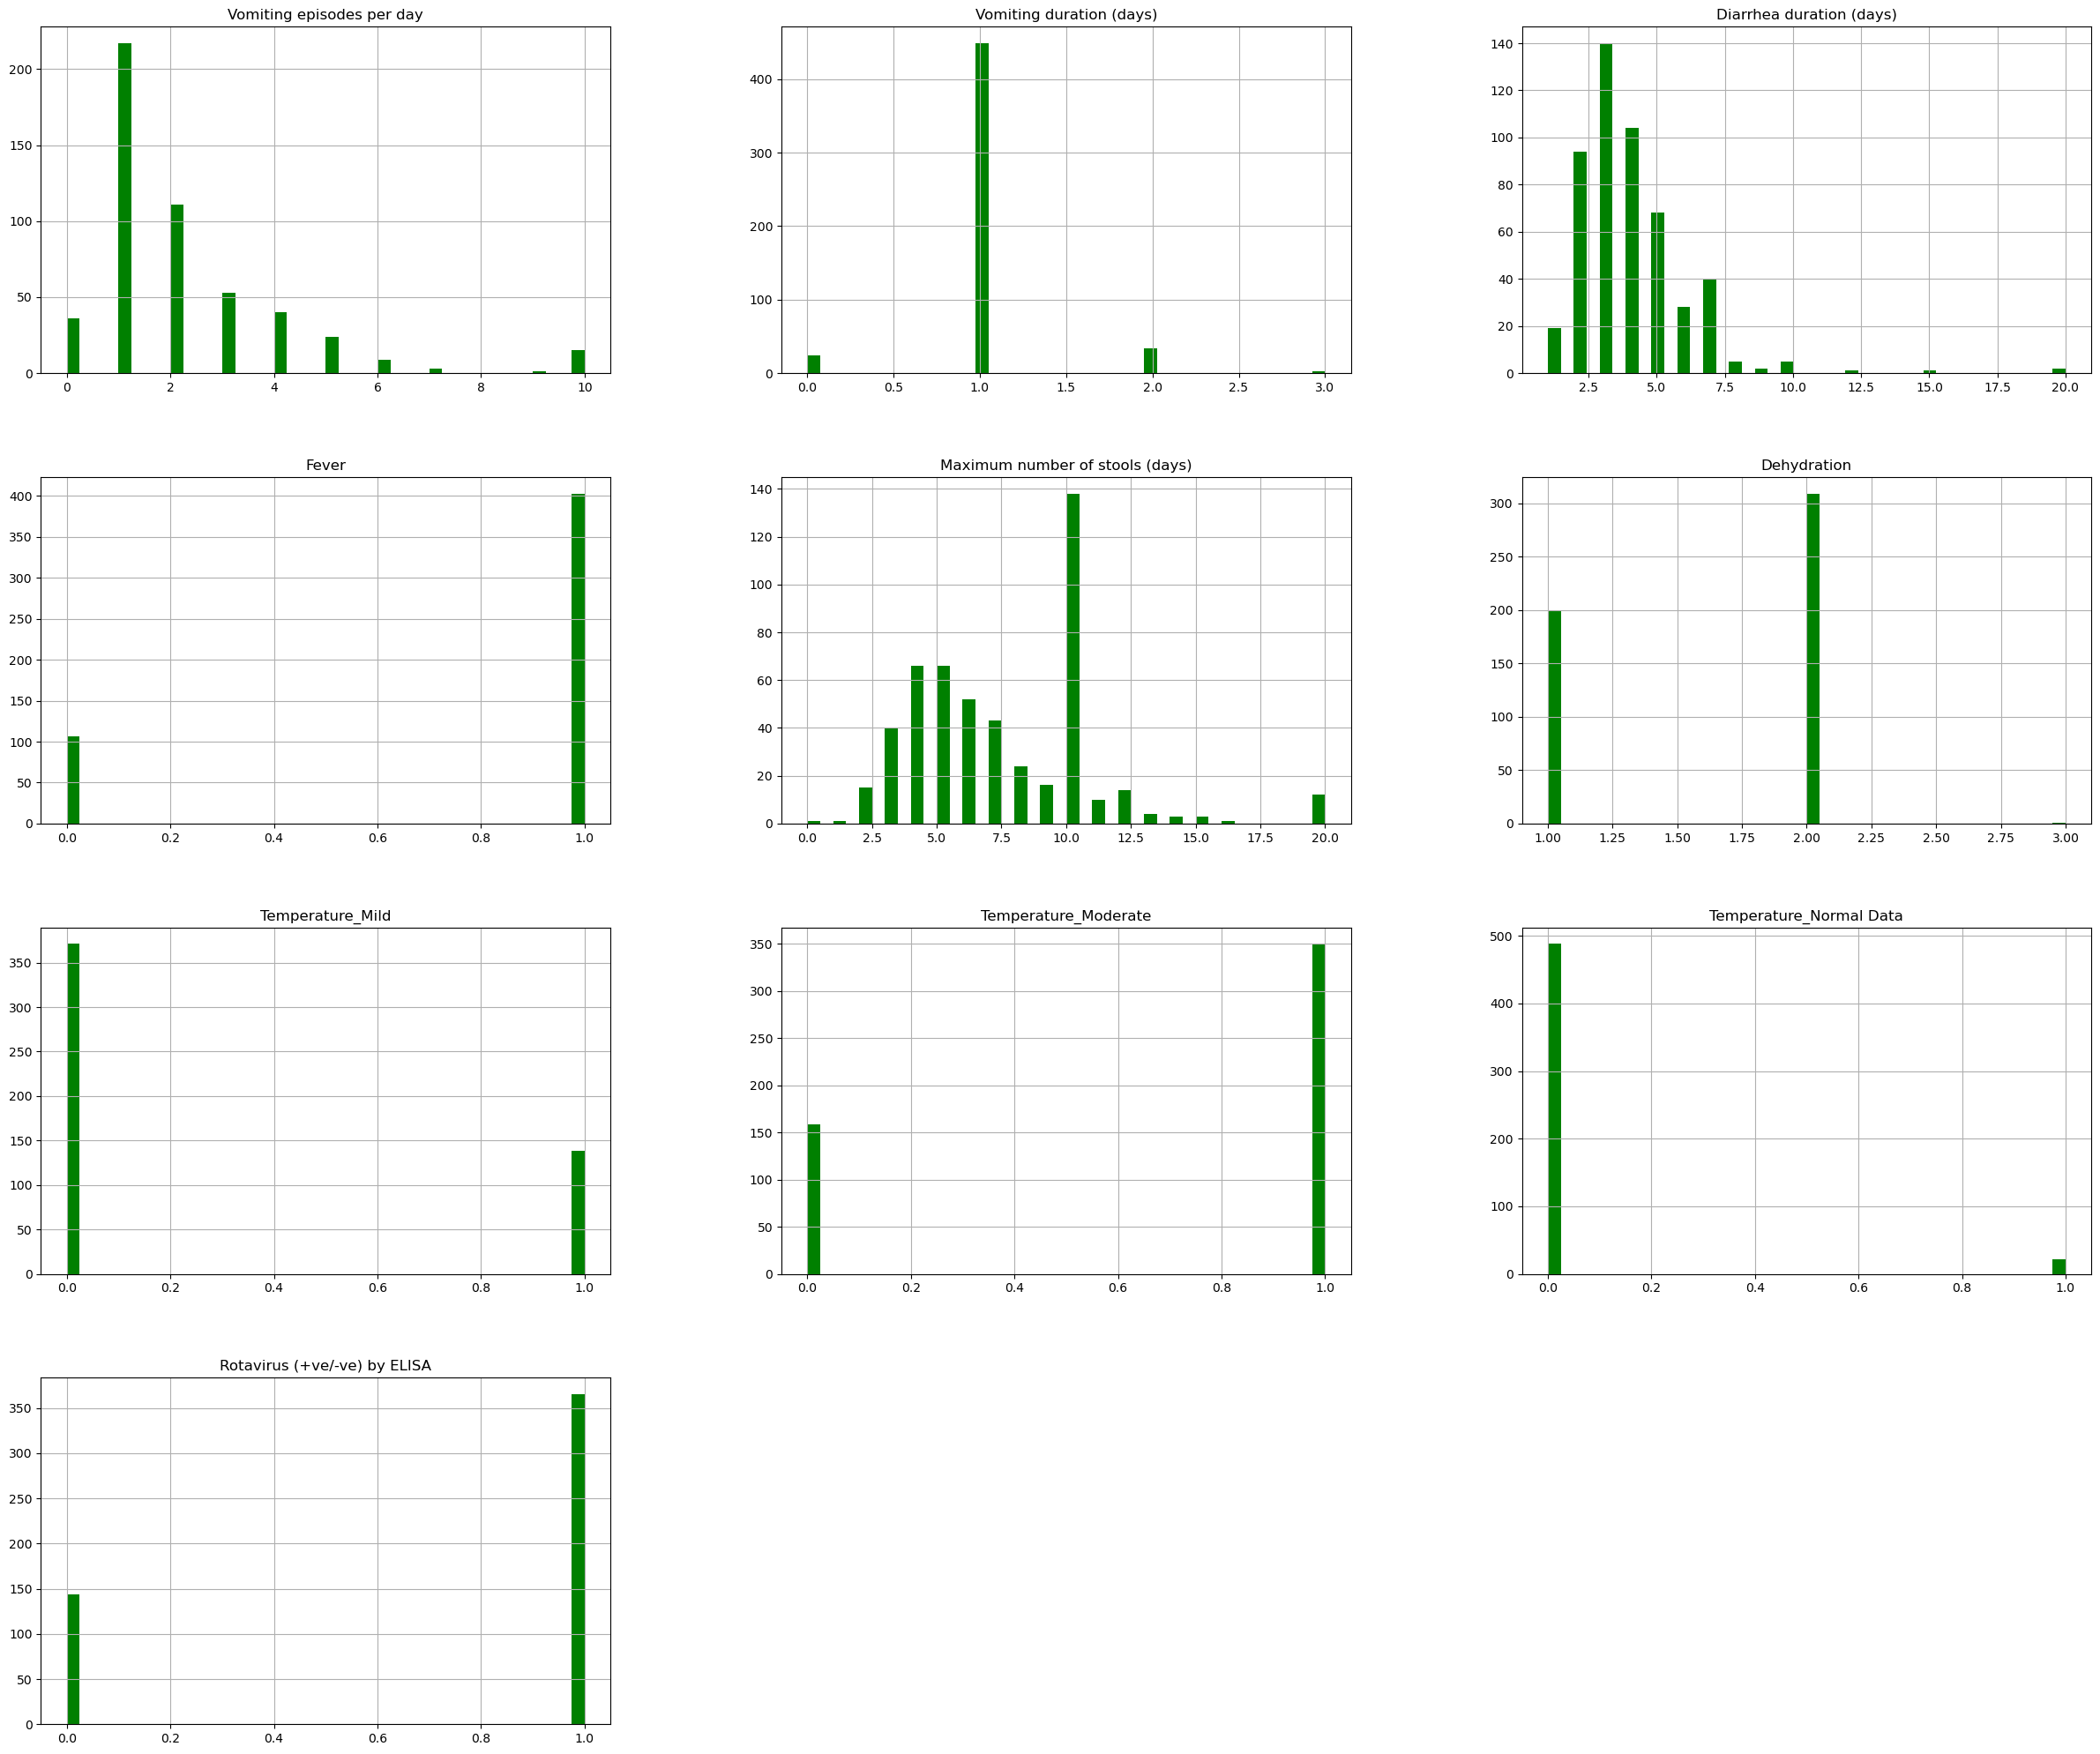

In [28]:
data.hist(bins=40, figsize=(30,25), color='green')


## CORRELATION MATRIX----->>>

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\sourav\AppData\Local\Temp\ipykernel_9896\1682629100.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


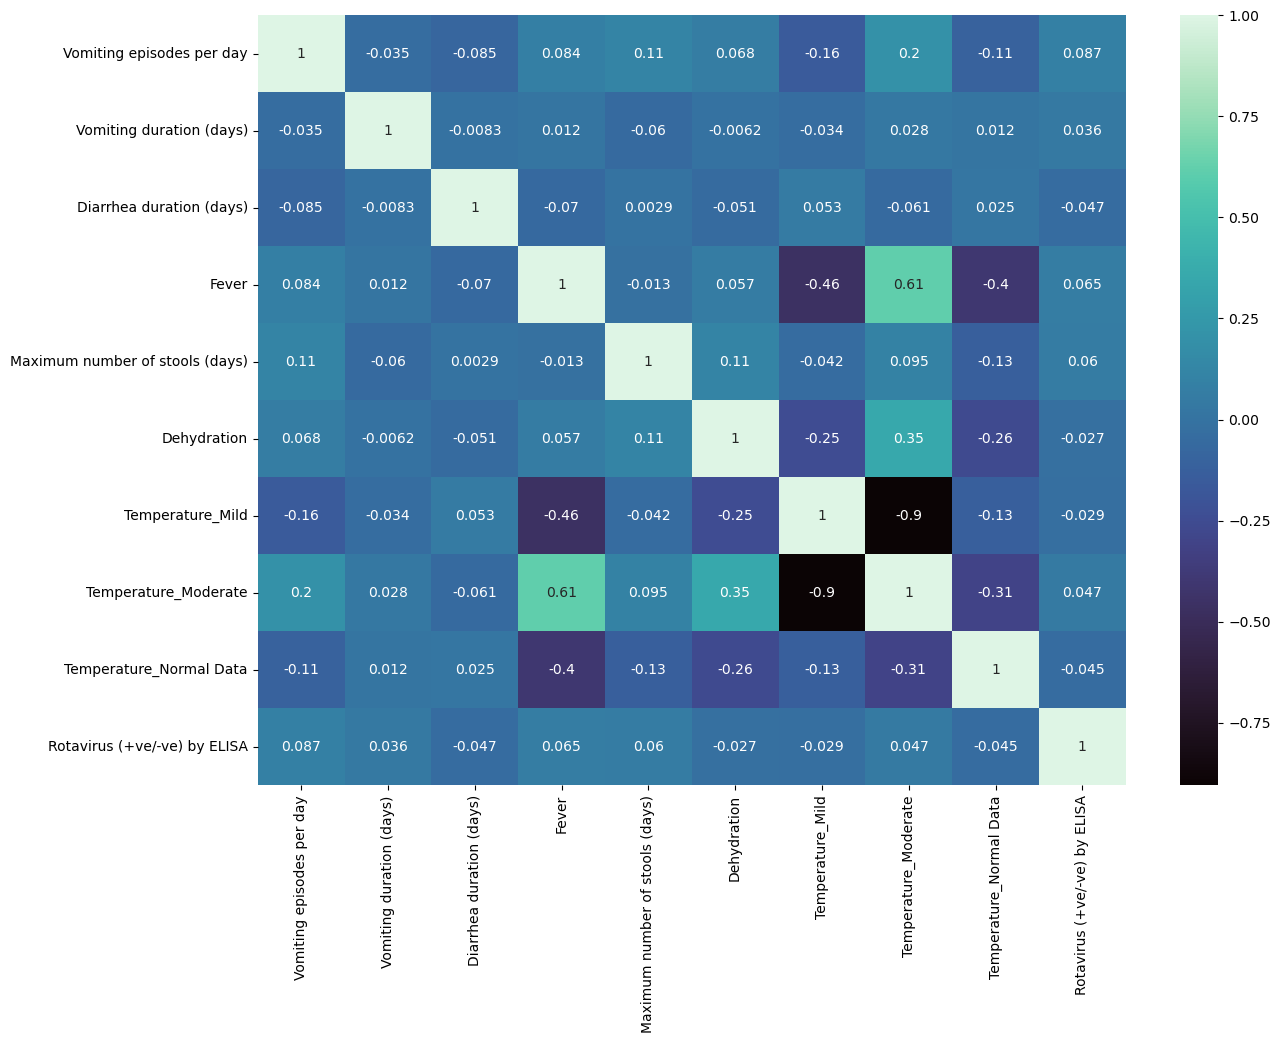

In [8]:
corr=data.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr,annot=True,cmap="mako")
plt.show()

In [9]:
x=data.drop(columns=['Sample labelling in Record Book','Rotavirus (+ve/-ve) by ELISA'],axis=1)
y=data['Rotavirus (+ve/-ve) by ELISA']

### SVM________>>>>

In [11]:
from sklearn import svm

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)
# print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

model_svm=svm.SVC(kernel='linear')
model_svm.fit(x_train,y_train)

y_predicted_train=model_svm.predict(x_train)
acc_train_svm=accuracy_score(y_train,y_predicted_train)

y_predicted_test=model_svm.predict(x_test)
acc_test_svm=accuracy_score(y_test,y_predicted_test)
    
print("TRAIN:",acc_train_svm,"TEST:",acc_test_svm)

precision_svm=precision_score(y_test,y_predicted_test)
recall_svm=recall_score(y_test,y_predicted_test)
f1_svm=f1_score(y_test,y_predicted_test)

print("precision:",precision_svm)
print("recall:",recall_svm)
print("f1:",f1_svm)

y_pred_svm=model_svm.decision_function(x_test)
# probs_svm=model_svm.predict_proba(x_test)

cm_train=confusion_matrix(y_train,y_predicted_train)
cm_test=confusion_matrix(y_test,y_predicted_test)
print("TRAIN:",cm_train,"\n TEST:",cm_test)


TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
precision: 0.7156862745098039
recall: 1.0
f1: 0.8342857142857142
TRAIN: [[  0 115]
 [  0 292]] 
 TEST: [[ 0 29]
 [ 0 73]]


In [14]:
from sklearn import svm
for i in range(300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
# print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

    model_svm=svm.SVC(kernel='linear')
    model_svm.fit(x_train,y_train)

    y_predicted_train=model_svm.predict(x_train)
    acc_train=accuracy_score(y_train,y_predicted_train)

    y_predicted_test=model_svm.predict(x_test)
    acc_test=accuracy_score(y_test,y_predicted_test)
    if((acc_train>=acc_test)&(acc_test>=0.7)):
        
        print(i,"TRAIN:",acc_train,"TEST:",acc_test)

12 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
14 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
26 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
28 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
30 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
33 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
38 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
52 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
58 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
67 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
74 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
81 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
87 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
91 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
94 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
96 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
97 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
102 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
111 TRAIN: 0.71990171990171

### CROSS VALIDATION---->

In [15]:
for i in range(2,20):
    score=cross_val_score(model_svm,x,y,cv=i).mean()
    print(i,score)

2 0.7053265400648447
3 0.7053254437869821
4 0.7034171998031497
5 0.7053387691710349
6 0.7170868347338936
7 0.7034137856055666
8 0.7053571428571429
9 0.7170704539125592
10 0.7170980392156863
11 0.7170969640904886
12 0.7170542635658914
13 0.7171104536489151
14 0.717181467181467
15 0.7171122994652406
16 0.7170488911290323
17 0.7171061528059498
18 0.7170224411603721
19 0.717198980356875


### HoldOut Validation Approach Train and Test split--->
##### randomly selects 20% of the test data as defined { not good }

In [197]:
model_svm.score(x_test,y_test)

0.7156862745098039

### K Fold Cross Validation---->
###### makes split whatever we have defined here 10

In [71]:
kfold_validation=KFold(10)
cross_val_score(model_svm,x,y,cv=kfold_validation).mean()

0.7168627450980392

### Stratified K-Fold Cross Validation---->
##### {used when one spectific data(cat) is more in number}

In [207]:
from sklearn.model_selection import StratifiedKFold
for i in range(2,20):
    skfold=StratifiedKFold(n_splits=i)
    score= cross_val_score(model_svm,x,y,cv=skfold).mean()
    print(i,score)

2 0.7053265400648447
3 0.7053254437869821
4 0.7034171998031497
5 0.7053387691710349
6 0.7170868347338936
7 0.7034137856055666
8 0.7053571428571429
9 0.7170704539125592
10 0.7170980392156863
11 0.7170969640904886
12 0.7170542635658914
13 0.7171104536489151
14 0.717181467181467
15 0.7171122994652406
16 0.7170488911290323
17 0.7171061528059498
18 0.7170224411603721
19 0.717198980356875


### Leave One Out Cross Validation----->
#### takes only one value from test data and validates with whole test data

In [210]:
from sklearn.model_selection import LeaveOneOut
score=cross_val_score(model_svm,x,y,cv=LeaveOneOut())
print(np.mean(score))

0.7170923379174853


### Repeated random train test split ---> ShaffleSplit
##### hybrid of train_test_splt and KFold crogdd validatiion method { best one }

In [72]:
from sklearn.model_selection import ShuffleSplit
s_split=ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
cross_val_score(model_svm,x,y,cv=s_split).mean()

0.718627450980392

In [12]:
cm_train=confusion_matrix(y_train,y_predicted_train)
cm_test=confusion_matrix(y_test,y_predicted_test)
print("TRAIN:",cm_train,"\n TEST:",cm_test)

TRAIN: [[  0 115]
 [  0 292]] 
 TEST: [[ 0 29]
 [ 0 73]]


Text(0.5, 1.0, 'Confusion Matrix of SVM')

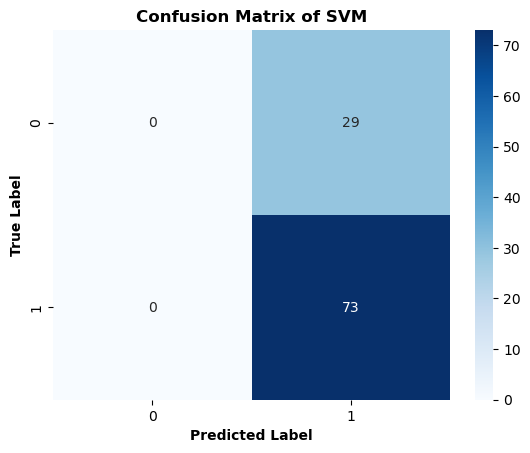

In [13]:
#------>
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test,cmap="Blues",annot=True,
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of SVM",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

### KNN_______>>>>

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
print(len(y))
import math
print(math.sqrt(len(y)))

509
22.561028345356956


In [14]:
from sklearn.model_selection import cross_val_score

knn_score=[]
for k in range(1,50):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_score.append(score.mean())
best_index = np.argmax(knn_score)
print("n_neighbors will be:",best_index)

n_neighbors will be: 22


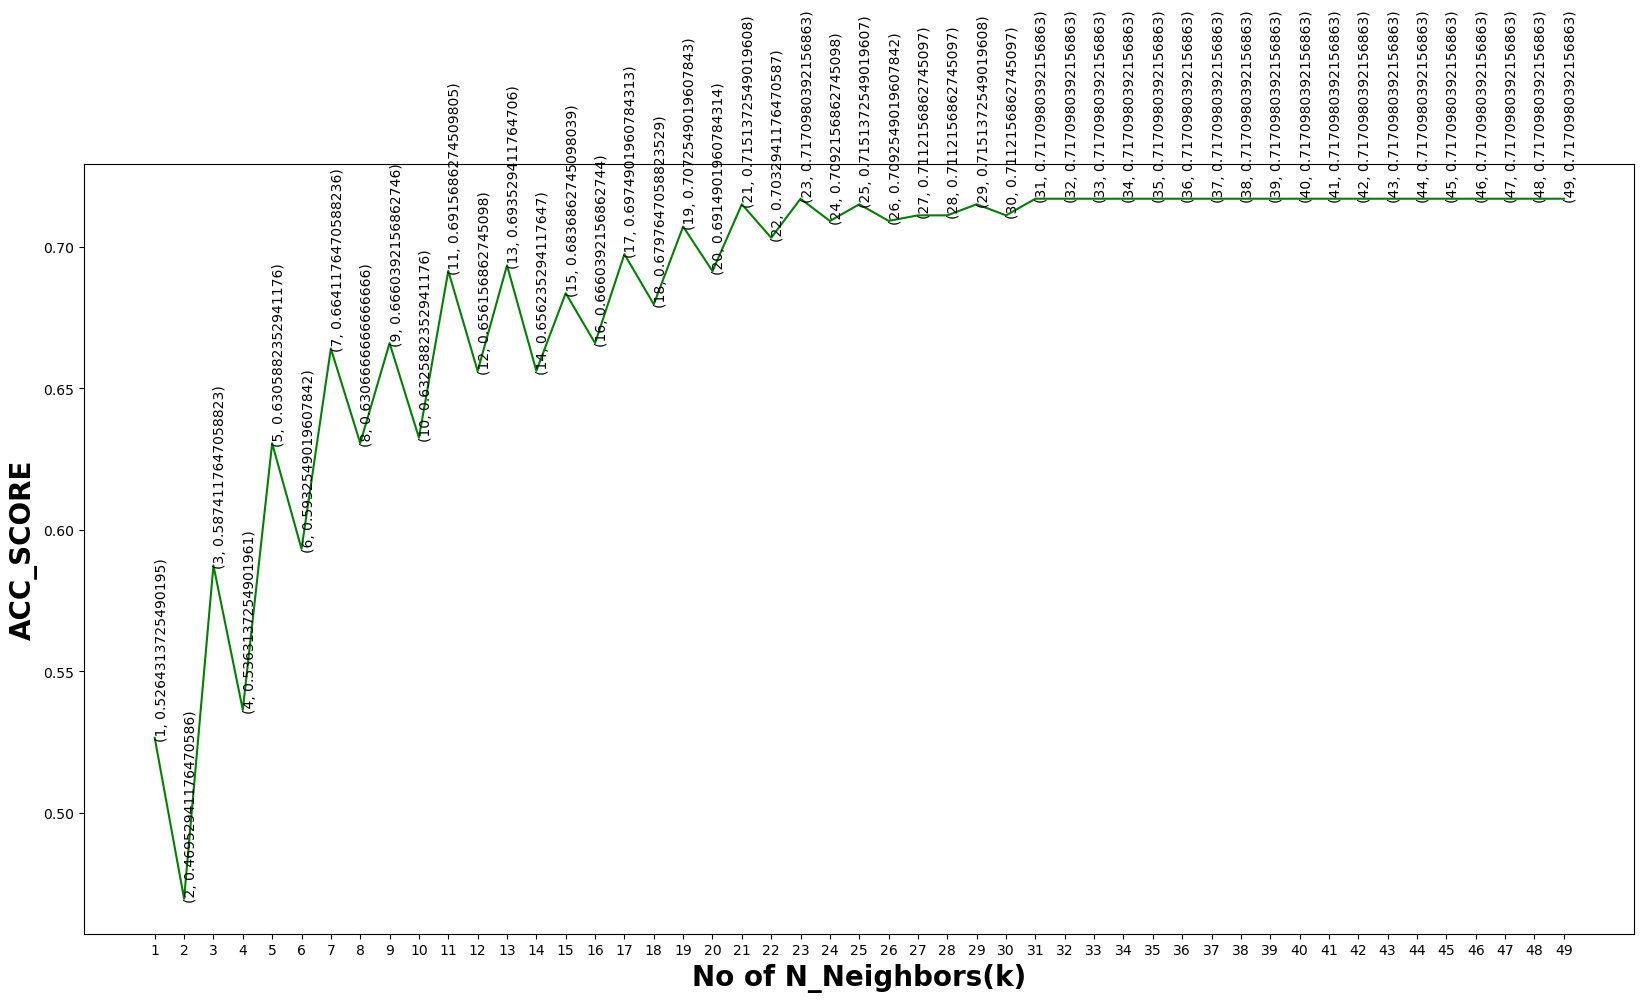

In [15]:
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1,50)],knn_score,color='green')
angle=90
for i in range(1,50):
    plt.text(i,knn_score[i-1],(i,knn_score[i-1]),rotation=angle)
plt.xticks([i for i in range(1,50)])

plt.xlabel("No of N_Neighbors(k)",fontsize=20,fontweight='bold')
plt.ylabel("ACC_SCORE",fontsize=20,fontweight='bold')

plt.show()


In [39]:
# best_n_neighbors = n_neighbors[best_index] 
# as best index= 20 so n_neighbour =20
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

model_knn=KNeighborsClassifier(n_neighbors=23)
score=cross_val_score(model_knn,x,y,cv=10)
score.mean()

(407, 9) (407,) (102, 9) (102,)


0.7170980392156863

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

model_knn=KNeighborsClassifier(n_neighbors=23)
model_knn.fit(x_train,y_train)

y_predicted_train=model_knn.predict(x_train)
acc_train_knn=accuracy_score(y_train,y_predicted_train)

y_predicted_test=model_knn.predict(x_test)
acc_test_knn=accuracy_score(y_test,y_predicted_test)

print("TRAIN:",acc_train_knn,"TEST:",acc_test_knn)

precision_knn=precision_score(y_test,y_predicted_test)
recall_knn=recall_score(y_test,y_predicted_test)
f1_knn=f1_score(y_test,y_predicted_test)

probs_knn=model_knn.predict_proba(x_test)


print("precision:",precision_knn)
print("recall:",recall_knn)
print("f1:",f1_knn)

(407, 9) (407,) (102, 9) (102,)
TRAIN: 0.7223587223587223 TEST: 0.7156862745098039
precision: 0.7346938775510204
recall: 0.96
f1: 0.8323699421965318


In [20]:
cm_train_knn=confusion_matrix(y_train,y_predicted_train)
cm_test_knn=confusion_matrix(y_test,y_predicted_test)
print("TRAIN:",cm_train,"\n TEST:",cm_test)

TRAIN: [[  0 115]
 [  0 292]] 
 TEST: [[ 0 29]
 [ 0 73]]


Text(0.5, 1.0, 'Confusion Matrix of KNN')

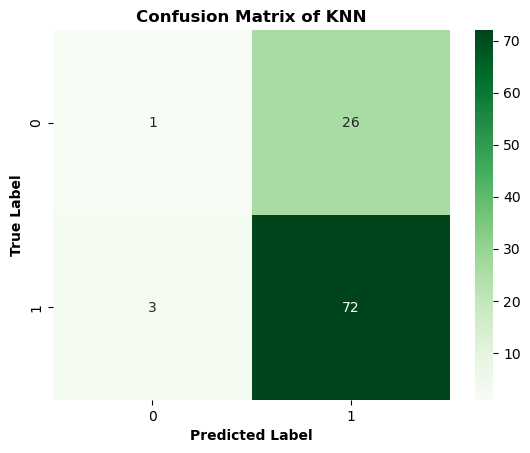

In [21]:
#------>
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_knn,cmap="Greens",annot=True,
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of KNN",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

In [83]:
model_knn.score(x,y)

0.7210216110019646

In [216]:
for i in range(2,20):
    score=cross_val_score(model_knn,x,y,cv=i).mean()
    print(i,score)

2 0.7151304616334723
3 0.7072630235526164
4 0.7131674458661418
5 0.7170840613473113
6 0.7151260504201681
7 0.715155468580126
8 0.7189980158730158
9 0.7150863269284321
10 0.7170980392156863
11 0.7151206795055084
12 0.7151162790697675
13 0.7171104536489151
14 0.7151973401973402
15 0.7131907308377896
16 0.7169858870967742
17 0.7170385395537524
18 0.719006568144499
19 0.7171240065976907


### HoldOut Validation Approach Train and Test split--->
##### randomly selects 20% of the test data as defined { not good }

In [218]:
model_knn.score(x_test,y_test)

0.7156862745098039

### K Fold Cross Validation---->
###### makes split whatever we have defined here 10

In [84]:
kfold_validation=KFold(10)
cross_val_score(model_knn,x,y,cv=kfold_validation).mean()

0.7109803921568627

### Stratified K-Fold Cross Validation---->
##### {used when one spectific data(cat) is more in number}

In [221]:
from sklearn.model_selection import StratifiedKFold
for i in range(2,20):
    skfold=StratifiedKFold(n_splits=i)
    score= cross_val_score(model_knn,x,y,cv=skfold).mean()
    print(i,score)

2 0.7151304616334723
3 0.7072630235526164
4 0.7131674458661418
5 0.7170840613473113
6 0.7151260504201681
7 0.715155468580126
8 0.7189980158730158
9 0.7150863269284321
10 0.7170980392156863
11 0.7151206795055084
12 0.7151162790697675
13 0.7171104536489151
14 0.7151973401973402
15 0.7131907308377896
16 0.7169858870967742
17 0.7170385395537524
18 0.719006568144499
19 0.7171240065976907


### Leave One Out Cross Validation----->
#### takes only one value from test data and validates with whole test data

In [222]:
from sklearn.model_selection import LeaveOneOut
score=cross_val_score(model_knn,x,y,cv=LeaveOneOut())
print(np.mean(score))

0.7190569744597249


### Repeated random train test split ---> ShaffleSplit
##### hybrid of train_test_splt and KFold cross validatiion method { best one }

In [244]:
from sklearn.model_selection import ShuffleSplit
for i in range(2,20):
    s_split=ShuffleSplit(n_splits=i,test_size=0.2,random_state=60)
    score=cross_val_score(model_knn,x,y,cv=s_split).mean()
    print(i,score)

2 0.7647058823529411
3 0.738562091503268
4 0.7254901960784315
5 0.7137254901960784
6 0.7189542483660132
7 0.715686274509804
8 0.7230392156862745
9 0.7189542483660131
10 0.7235294117647059
11 0.7237076648841355
12 0.7230392156862745
13 0.7202111613876319
14 0.7240896358543417
15 0.7248366013071894
16 0.7236519607843137
17 0.723760092272203
18 0.7233115468409586
19 0.7249742002063982


In [85]:
from sklearn.model_selection import ShuffleSplit
s_split=ShuffleSplit(n_splits=2,test_size=0.2,random_state=60)
score=cross_val_score(model_knn,x,y,cv=s_split).mean()
print(score)

0.7647058823529411


In [56]:
# 60 TRAIN: 0.7223587223587223 TEST: 0.7156862745098039
# 81 TRAIN: 0.7223587223587223 TEST: 0.7156862745098039
for i in range(300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
#     print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

    model_knn=KNeighborsClassifier(n_neighbors=23)
    model_knn.fit(x_train,y_train)

    y_predicted_train=model_knn.predict(x_train)
    acc_train=accuracy_score(y_train,y_predicted_train)

    y_predicted_test=model_knn.predict(x_test)
    acc_test=accuracy_score(y_test,y_predicted_test)
    
    if((acc_test>=0.7)&(acc_train>=acc_test)):
        print(i,"TRAIN:",acc_train,"TEST:",acc_test)

26 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
28 TRAIN: 0.7174447174447175 TEST: 0.7058823529411765
30 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
33 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
41 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
42 TRAIN: 0.7248157248157249 TEST: 0.7058823529411765
60 TRAIN: 0.7223587223587223 TEST: 0.7156862745098039
67 TRAIN: 0.7199017199017199 TEST: 0.7156862745098039
81 TRAIN: 0.7223587223587223 TEST: 0.7156862745098039
85 TRAIN: 0.7174447174447175 TEST: 0.7058823529411765
87 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
102 TRAIN: 0.714987714987715 TEST: 0.7058823529411765
103 TRAIN: 0.714987714987715 TEST: 0.7058823529411765
113 TRAIN: 0.7223587223587223 TEST: 0.7058823529411765
125 TRAIN: 0.714987714987715 TEST: 0.7058823529411765
128 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
135 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
138 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
139 TRAIN: 0.72235872235

### LOGISTIC REGRESSION______>>>>

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=64)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(407, 9) (407,) (102, 9) (102,)


In [22]:
from sklearn.linear_model import LogisticRegression
model_logistic_R = LogisticRegression()
model_logistic_R.fit(x_train,y_train)

LogisticRegression()

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=64)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

from sklearn.linear_model import LogisticRegression
model_logistic_R = LogisticRegression()
model_logistic_R.fit(x_train,y_train)

y_predicted_train=model_logistic_R.predict(x_train)
acc_train=accuracy_score(y_train,y_predicted_train)

y_predicted_test=model_logistic_R.predict(x_test)
acc_test=accuracy_score(y_test,y_predicted_test)

print("TRAIN:",acc_train,"TEST:",acc_test)

precision_log_r=precision_score(y_test,y_predicted_test)
recall_log_r=recall_score(y_test,y_predicted_test)
f1_log_r=f1_score(y_test,y_predicted_test)

print("precision:",precision_log_r)
print("recall:",recall_log_r)
print("f1:",f1_log_r)

cm_train_logiR=confusion_matrix(y_train,y_predicted_train)
cm_test_logiR=confusion_matrix(y_test,y_predicted_test)
print("TRAIN:",cm_train,"\n TEST:",cm_test)


(407, 9) (407,) (102, 9) (102,)
TRAIN: 0.7199017199017199 TEST: 0.7156862745098039
precision: 0.7227722772277227
recall: 0.9864864864864865
f1: 0.8342857142857142
TRAIN: [[  0 115]
 [  0 292]] 
 TEST: [[ 0 29]
 [ 0 73]]


Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression')

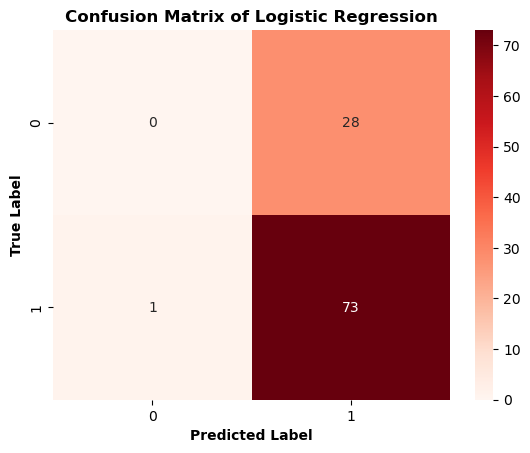

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_logiR,cmap="Reds",annot=True,
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Logistic Regression",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

In [24]:
score_logistic_R=model_logistic_R.score(x,y)
print(score_logistic_R)

0.7190569744597249


In [251]:
for i in range(2,20):
    score=cross_val_score(model_logistic_R,x,y,cv=i).mean()
    print(score)

0.7033117183881427
0.7033298526511196


C:\Users\sourav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.697511687992126
0.7052805280528054
0.7111344537815126
0.6974614046531855
0.7072482638888888
0.7150515176830967
0.7131764705882354
0.7111681103355479
0.7111018826135105
0.7111932938856016
0.7112290862290862
0.7131907308377896


C:\Users\sourav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7130166330645161
0.7131845841784988
0.7130541871921181
0.7131503973609237


### Repeated random train test split ---> ShaffleSplit
##### hybrid of train_test_splt and KFold cross validatiion method { best one }

In [252]:
from sklearn.model_selection import ShuffleSplit
for i in range(2,20):
    s_split=ShuffleSplit(n_splits=i,test_size=0.2,random_state=64)
    score=cross_val_score(model_logistic_R,x,y,cv=s_split).mean()
    print(i,score)

2 0.7107843137254902
3 0.7156862745098039
4 0.7058823529411764
5 0.7039215686274509
6 0.7058823529411765
7 0.6918767507002801
8 0.6899509803921569
9 0.6928104575163399
10 0.6931372549019608
11 0.6925133689839572
12 0.6919934640522877
13 0.6968325791855203
14 0.6981792717086834
15 0.6986928104575162
16 0.6997549019607843
17 0.6989619377162629
18 0.6977124183006534
19 0.7012383900928791


In [57]:
cm_train_logiR=confusion_matrix(y_train,y_predicted_train)
cm_test_logiR=confusion_matrix(y_test,y_predicted_test)
print("TRAIN:",cm_train,"\n TEST:",cm_test)

TRAIN: [[  2 114]
 [  0 291]] 
 TEST: [[ 0 28]
 [ 1 73]]


In [69]:
# 52 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
# 58 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
# 64 TRAIN: 0.7199017199017199 TEST: 0.7156862745098039

from sklearn.linear_model import LogisticRegression
model_logistic_R = LogisticRegression()
for i in range(300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    
    model_logistic_R.fit(x_train,y_train)
    y_predicted_train=model_logistic_R.predict(x_train)
    acc_train=accuracy_score(y_train,y_predicted_train)

    y_predicted_test=model_logistic_R.predict(x_test)
    acc_test=accuracy_score(y_test,y_predicted_test)
    if ((acc_train>=acc_test)&(acc_test>=0.7)):
        print(i,"TRAIN:",acc_train,"TEST:",acc_test)
    

12 TRAIN: 0.714987714987715 TEST: 0.7058823529411765
14 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
26 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
28 TRAIN: 0.7174447174447175 TEST: 0.7058823529411765
30 TRAIN: 0.7223587223587223 TEST: 0.7058823529411765
33 TRAIN: 0.714987714987715 TEST: 0.7058823529411765
50 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
52 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
58 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
64 TRAIN: 0.7199017199017199 TEST: 0.7156862745098039
67 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039


C:\Users\sourav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


81 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
87 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
91 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039


C:\Users\sourav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


94 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
96 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039


C:\Users\sourav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


102 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
108 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
111 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
125 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
128 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
135 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
138 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
139 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
141 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
143 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
158 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765


C:\Users\sourav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


173 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
175 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
179 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
180 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765


C:\Users\sourav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


193 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
197 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
198 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
205 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
207 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039


C:\Users\sourav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


219 TRAIN: 0.7248157248157249 TEST: 0.7156862745098039
221 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
224 TRAIN: 0.7125307125307125 TEST: 0.7058823529411765
230 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039


C:\Users\sourav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


236 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
239 TRAIN: 0.7248157248157249 TEST: 0.7058823529411765
242 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039


C:\Users\sourav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


249 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
270 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765
282 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
294 TRAIN: 0.7174447174447175 TEST: 0.7156862745098039
295 TRAIN: 0.7199017199017199 TEST: 0.7156862745098039
299 TRAIN: 0.7199017199017199 TEST: 0.7058823529411765


### NAIVE BAYES----->

In [22]:
# 51 TRAIN: 0.7100737100737101 TEST: 0.7058823529411765

from sklearn.naive_bayes import GaussianNB
for i in range(300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)


    model_naive_bayes=GaussianNB()
    model_naive_bayes.fit(x_train,y_train)
 
    y_predicted_test=model_naive_bayes.predict(x_test)
    acc_test=accuracy_score(y_test,y_predicted_test)
    y_predicted_train=model_naive_bayes.predict(x_train)
    acc_train=accuracy_score(y_train,y_predicted_train)

    if ((acc_train>=acc_test)&(acc_test>=0.7)):
        print(i,"TRAIN:",acc_train,"TEST:",acc_test)

2 TRAIN: 0.7076167076167076 TEST: 0.7058823529411765
13 TRAIN: 0.7076167076167076 TEST: 0.7058823529411765
51 TRAIN: 0.7100737100737101 TEST: 0.7058823529411765


In [25]:
from sklearn.naive_bayes import GaussianNB

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)


model_naive_bayes=GaussianNB()
model_naive_bayes.fit(x_train,y_train)
 
y_predicted_test=model_naive_bayes.predict(x_test)
acc_test=accuracy_score(y_test,y_predicted_test)
y_predicted_train=model_naive_bayes.predict(x_train)
acc_train=accuracy_score(y_train,y_predicted_train)

print("TRAIN:",acc_train,"TEST:",acc_test)

precision_nb=precision_score(y_test,y_predicted_test)
recall_nb=recall_score(y_test,y_predicted_test)
f1_nb=f1_score(y_test,y_predicted_test)

print("precision:",precision_nb)
print("recall:",recall_nb)
print("f1:",f1_nb)

# y_pred_naive_bayes=model_svm.decision_function(x_test)
probs_naive=model_naive_bayes.predict_proba(x_test)


cm_test_naive=confusion_matrix(y_test,y_predicted_test)
cm_train_naive=confusion_matrix(y_train,y_predicted_train)

print("TRAIN:",cm_train_naive,"\n TEST:",cm_test_naive)



TRAIN: 0.7100737100737101 TEST: 0.7058823529411765
precision: 0.7666666666666667
recall: 0.8846153846153846
f1: 0.8214285714285715
TRAIN: [[ 18 102]
 [ 16 271]] 
 TEST: [[ 3 21]
 [ 9 69]]


In [258]:
model_naive_bayes.score(x,y)

0.7092337917485265

In [259]:
for i in range(2,20):
    score=cross_val_score(model_naive_bayes,x,y,cv=i).mean()
    print(i,score)

2 0.6738304770727188
3 0.6994082840236686
4 0.6935746801181103
5 0.6797709182682975
6 0.6837068160597574
7 0.6425581648184389
8 0.6719680059523809
9 0.6719576719576719
10 0.670078431372549
11 0.6799259944495837
12 0.6798634182355112
13 0.6937869822485208
14 0.6725117975117977
15 0.6877599524658348
16 0.6799395161290323
17 0.6897227856659905
18 0.6860974274767377
19 0.6898335582546109


### Repeated random train test split ---> ShaffleSplit
##### hybrid of train_test_splt and KFold cross validatiion method { best one }

In [95]:
from sklearn.model_selection import ShuffleSplit
for i in range(2,20):
    s_split=ShuffleSplit(n_splits=i,test_size=0.2,random_state=51)
    score=cross_val_score(model_naive_bayes,x,y,cv=s_split).mean()
    print(i,score)

2 0.7009803921568627
3 0.7124183006535948
4 0.7083333333333333
5 0.7196078431372548
6 0.7091503267973857
7 0.7128851540616247
8 0.6911764705882353
9 0.6938997821350763
10 0.6872549019607843
11 0.6844919786096257
12 0.6838235294117648
13 0.6855203619909502
14 0.6876750700280112
15 0.6862745098039215
16 0.6832107843137255
17 0.6753171856978085
18 0.6753812636165577
19 0.6692466460268317


In [26]:
cm_test_naive=confusion_matrix(y_test,y_predicted_test)
cm_train_naive=confusion_matrix(y_train,y_predicted_train)

print("TRAIN:",cm_train_naive,"\n TEST:",cm_test_naive)

TRAIN: [[ 18 102]
 [ 16 271]] 
 TEST: [[ 3 21]
 [ 9 69]]


Text(0.5, 1.0, 'Confusion Matrix of Naive Bayes')

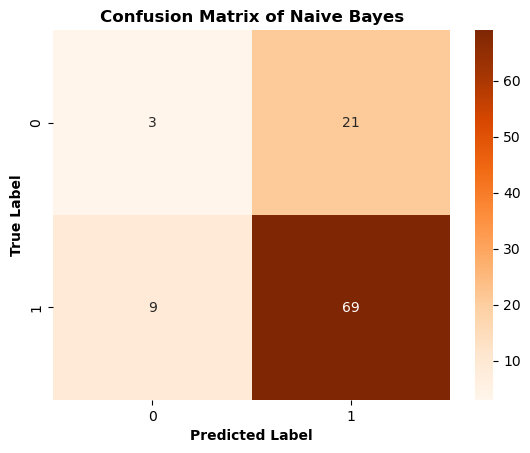

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_naive,cmap="Oranges",annot=True,
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Naive Bayes",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

### DECISION TREE_______>>>>

TRAIN 0.8304668304668305 TEST 0.7647058823529411
precision: 0.813953488372093
recall: 0.8974358974358975
f1: 0.8536585365853658
TRAIN: [[ 66  54]
 [ 15 272]] 
 TEST: [[ 8 16]
 [ 8 70]]


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree')

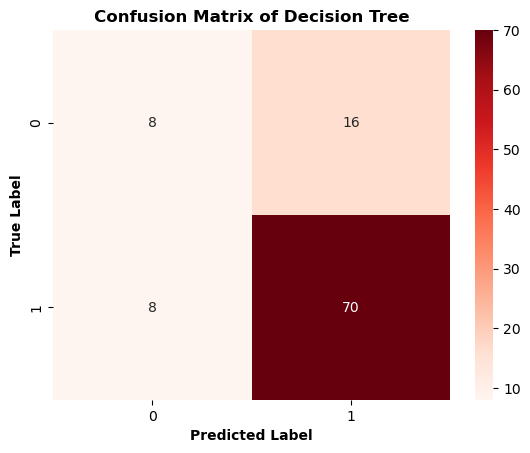

In [32]:
from sklearn.tree import DecisionTreeClassifier 

np.random.seed(8)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

model_decision_tree=DecisionTreeClassifier(criterion='entropy',max_depth=13)
model_decision_tree.fit(x_train,y_train)

y_predicted_train_dt=model_decision_tree.predict(x_train)
acc_train=accuracy_score(y_train,y_predicted_train_dt)

y_predicted_test_dt=model_decision_tree.predict(x_test)
acc_test=accuracy_score(y_test,y_predicted_test_dt)
print("TRAIN",acc_train,"TEST",acc_test)

precision_dt=precision_score(y_test,y_predicted_test_dt)
recall_dt=recall_score(y_test,y_predicted_test_dt)
f1_dt=f1_score(y_test,y_predicted_test_dt)

print("precision:",precision_dt)
print("recall:",recall_dt)
print("f1:",f1_dt)

# y_pred_dt=model_decision_tree.decision_function(x_test)
probs_dt=model_decision_tree.predict_proba(x_test)


cm_test_dt=confusion_matrix(y_test,y_predicted_test_dt)
cm_train_dt=confusion_matrix(y_train,y_predicted_train_dt)

print("TRAIN:",cm_train_dt,"\n TEST:",cm_test_dt)

#---->
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_dt,cmap="Reds",annot=True,
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Decision Tree",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

In [30]:
cm_test_dt=confusion_matrix(y_test,y_predicted_test)
cm_train_dt=confusion_matrix(y_train,y_predicted_train)

print("TRAIN:",cm_train_dt,"\n TEST:",cm_test_dt)

TRAIN: [[ 18 102]
 [ 16 271]] 
 TEST: [[ 3 21]
 [ 9 69]]


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree')

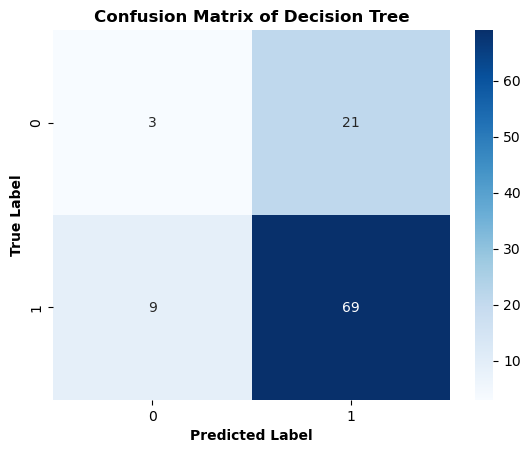

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_dt,cmap="Blues",annot=True,
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Decision Tree",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

In [440]:
for i in range(2,30):
    score=cross_val_score(model_decision_tree,x,y,cv=i).mean()
    print(i,score)

2 0.5736066079975297
3 0.5775844065436826
4 0.5914431594488189
5 0.601145408658513
6 0.6069794584500467
7 0.5776255707762558
8 0.5930369543650793
9 0.6009468114731272
10 0.569843137254902
11 0.5523925658060718
12 0.5538944259874493
13 0.5898915187376725
14 0.6110574860574861
15 0.5797385620915031
16 0.5954511088709677
17 0.5503042596348884
18 0.5738232074438971
19 0.5658269605638026
20 0.5677692307692308
21 0.589920634920635
22 0.5839097496706191
23 0.57604399381337
24 0.5836940836940837
25 0.5661904761904762
26 0.5816801619433198
27 0.5991986138184968
28 0.5763366750208856
29 0.5693035835023665


In [441]:
score_DT=cross_val_score(model_decision_tree,x,y,cv=14).mean()
score_DT

0.6051587301587301

### Repeated random train test split ---> ShaffleSplit
##### hybrid of train_test_splt and KFold cross validatiion method { best one }

In [113]:
from sklearn.model_selection import ShuffleSplit
for i in range(2,20):
    s_split=ShuffleSplit(n_splits=i,test_size=0.2,random_state=51)
    score=cross_val_score(model_decision_tree,x,y,cv=s_split).mean()
    print(score)

0.6862745098039216
0.6405228758169934
0.6102941176470588
0.6156862745098038
0.6062091503267973
0.5980392156862744
0.6151960784313726
0.6100217864923747
0.6196078431372549
0.6229946524064172
0.6127450980392157
0.607843137254902
0.5952380952380952
0.6006535947712418
0.5919117647058824
0.5899653979238755
0.5882352941176471
0.585655314757482


In [84]:
# 0 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
# 0 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
# 1 4 7 TRAIN 0.7592137592137592 TEST 0.7549019607843137

# 0 96 8 TRAIN 0.7616707616707616 TEST 0.7549019607843137

# 40 259 7 TRAIN 0.769041769041769 TEST 0.7647058823529411
# 46 259 7 TRAIN 0.769041769041769 TEST 0.7647058823529411

# 1 245 9 TRAIN 0.773955773955774 TEST 0.7549019607843137
# 39 254 7 TRAIN 0.773955773955774 TEST 0.7647058823529411

# 37 27 9 TRAIN 0.7764127764127764 TEST 0.7647058823529411

# 47 27 9 TRAIN 0.7764127764127764 TEST 0.7745098039215687

# 0 27 10 TRAIN 0.7911547911547911 TEST 0.7549019607843137
# 0 51 10 TRAIN 0.7911547911547911 TEST 0.7549019607843137

# 2 48 9 TRAIN 0.7985257985257985 TEST 0.7647058823529411
# 4 48 9 TRAIN 0.7985257985257985 TEST 0.7647058823529411
# 50 48 9 TRAIN 0.7985257985257985 TEST 0.7647058823529411

# 1 51 13 TRAIN 0.828009828009828 TEST 0.7549019607843137

# 2 51 13 TRAIN 0.828009828009828 TEST 0.7647058823529411


from sklearn.tree import DecisionTreeClassifier 
for k in range(100):
    random_seed=k
    for i in range(300):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
        for j in range(1,300):
            model_decision_tree=DecisionTreeClassifier(criterion='entropy',max_depth=j)
            model_decision_tree.fit(x_train,y_train)

            y_predicted_train=model_decision_tree.predict(x_train)
            acc_train=accuracy_score(y_train,y_predicted_train)

            y_predicted_test=model_decision_tree.predict(x_test)
            acc_test=accuracy_score(y_test,y_predicted_test)
     
            if((acc_test<=acc_train)&(acc_test>=0.73)):
                print(k,i,j,"TRAIN",acc_train,"TEST",acc_test)

0 4 6 TRAIN 0.7444717444717445 TEST 0.7352941176470589
0 4 7 TRAIN 0.7592137592137592 TEST 0.7549019607843137
0 8 7 TRAIN 0.7469287469287469 TEST 0.7450980392156863
0 19 7 TRAIN 0.7395577395577395 TEST 0.7352941176470589
0 27 10 TRAIN 0.7911547911547911 TEST 0.7549019607843137
0 39 11 TRAIN 0.7714987714987716 TEST 0.7352941176470589
0 45 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
0 48 12 TRAIN 0.8648648648648649 TEST 0.7352941176470589
0 51 7 TRAIN 0.7567567567567568 TEST 0.7549019607843137
0 51 8 TRAIN 0.7641277641277642 TEST 0.7549019607843137
0 51 9 TRAIN 0.7764127764127764 TEST 0.7450980392156863
0 51 10 TRAIN 0.7911547911547911 TEST 0.7549019607843137
0 51 12 TRAIN 0.8181818181818182 TEST 0.7352941176470589
0 51 13 TRAIN 0.8304668304668305 TEST 0.7450980392156863
0 70 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
0 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
0 73 7 TRAIN 0.7567567567567568 TEST 0.7450980392156863
0 76 7 TRAIN 0.7493857493857494 TEST 0.735294

2 51 8 TRAIN 0.7641277641277642 TEST 0.7549019607843137
2 51 9 TRAIN 0.7764127764127764 TEST 0.7352941176470589
2 51 10 TRAIN 0.7911547911547911 TEST 0.7450980392156863
2 51 11 TRAIN 0.800982800982801 TEST 0.7352941176470589
2 51 12 TRAIN 0.8181818181818182 TEST 0.7450980392156863
2 51 13 TRAIN 0.828009828009828 TEST 0.7647058823529411
2 55 6 TRAIN 0.7444717444717445 TEST 0.7352941176470589
2 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
2 72 10 TRAIN 0.7641277641277642 TEST 0.7450980392156863
2 73 7 TRAIN 0.7567567567567568 TEST 0.7549019607843137
2 73 8 TRAIN 0.7665847665847666 TEST 0.7352941176470589
2 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
2 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
2 122 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
2 122 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
2 122 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
2 122 11 TRAIN 0.7960687960687961 TEST 0.7450980392156863
2 122 14 TRAIN 0.8427518427518428 TEST 0.

4 55 6 TRAIN 0.7444717444717445 TEST 0.7352941176470589
4 70 10 TRAIN 0.773955773955774 TEST 0.7352941176470589
4 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
4 73 7 TRAIN 0.7567567567567568 TEST 0.7450980392156863
4 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
4 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
4 115 9 TRAIN 0.7886977886977887 TEST 0.7352941176470589
4 119 8 TRAIN 0.7469287469287469 TEST 0.7450980392156863
4 119 9 TRAIN 0.7665847665847666 TEST 0.7352941176470589
4 122 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
4 122 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
4 122 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
4 122 10 TRAIN 0.7813267813267813 TEST 0.7352941176470589
4 122 11 TRAIN 0.7960687960687961 TEST 0.7450980392156863
4 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
4 128 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
4 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
4 145 5 TRAIN 0.7371007371007371 TES

6 73 7 TRAIN 0.7567567567567568 TEST 0.7549019607843137
6 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
6 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
6 96 8 TRAIN 0.7641277641277642 TEST 0.7450980392156863
6 115 9 TRAIN 0.7886977886977887 TEST 0.7352941176470589
6 121 9 TRAIN 0.7518427518427518 TEST 0.7450980392156863
6 122 7 TRAIN 0.7493857493857494 TEST 0.7450980392156863
6 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
6 128 8 TRAIN 0.7518427518427518 TEST 0.7352941176470589
6 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
6 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
6 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
6 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
6 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
6 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
6 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
6 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
6 171 8 TRAIN 0.7641277641277642 TEST

8 115 9 TRAIN 0.7886977886977887 TEST 0.7352941176470589
8 119 8 TRAIN 0.7469287469287469 TEST 0.7450980392156863
8 121 9 TRAIN 0.7518427518427518 TEST 0.7352941176470589
8 122 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
8 122 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
8 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
8 128 8 TRAIN 0.7518427518427518 TEST 0.7352941176470589
8 133 7 TRAIN 0.7518427518427518 TEST 0.7450980392156863
8 133 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
8 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
8 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
8 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
8 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
8 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
8 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
8 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
8 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
8 171 8 TRAIN 0.7641277641277642 

10 161 8 TRAIN 0.7371007371007371 TEST 0.7352941176470589
10 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
10 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
10 171 6 TRAIN 0.7371007371007371 TEST 0.7352941176470589
10 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
10 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
10 171 9 TRAIN 0.7714987714987716 TEST 0.7352941176470589
10 176 6 TRAIN 0.7592137592137592 TEST 0.7352941176470589
10 177 8 TRAIN 0.742014742014742 TEST 0.7352941176470589
10 195 6 TRAIN 0.7714987714987716 TEST 0.7352941176470589
10 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
10 208 7 TRAIN 0.7665847665847666 TEST 0.7549019607843137
10 208 12 TRAIN 0.8329238329238329 TEST 0.7352941176470589
10 214 9 TRAIN 0.7567567567567568 TEST 0.7352941176470589
10 222 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
10 230 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
10 230 5 TRAIN 0.7493857493857494 TEST 0.7352941176470589
10 230 6 TRAIN 

12 133 7 TRAIN 0.7518427518427518 TEST 0.7450980392156863
12 133 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
12 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
12 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
12 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
12 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
12 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
12 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
12 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
12 169 9 TRAIN 0.7395577395577395 TEST 0.7352941176470589
12 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
12 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
12 171 9 TRAIN 0.773955773955774 TEST 0.7352941176470589
12 176 6 TRAIN 0.7592137592137592 TEST 0.7352941176470589
12 177 8 TRAIN 0.742014742014742 TEST 0.7352941176470589
12 195 6 TRAIN 0.7714987714987716 TEST 0.7352941176470589
12 208 6 TRAIN 0.7542997542997543 TEST 0.7352941176470589
12 208 7 TRAIN 0.7

14 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
14 128 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
14 133 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
14 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
14 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
14 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
14 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
14 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
14 161 8 TRAIN 0.7371007371007371 TEST 0.7352941176470589
14 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
14 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
14 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
14 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
14 171 9 TRAIN 0.7714987714987716 TEST 0.7352941176470589
14 176 6 TRAIN 0.7592137592137592 TEST 0.7352941176470589
14 177 8 TRAIN 0.742014742014742 TEST 0.7352941176470589
14 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
14 208 7 TRAIN 0.

16 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
16 72 10 TRAIN 0.7641277641277642 TEST 0.7450980392156863
16 73 7 TRAIN 0.7567567567567568 TEST 0.7549019607843137
16 73 8 TRAIN 0.7665847665847666 TEST 0.7352941176470589
16 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
16 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
16 115 8 TRAIN 0.7665847665847666 TEST 0.7352941176470589
16 121 9 TRAIN 0.7518427518427518 TEST 0.7352941176470589
16 122 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
16 122 7 TRAIN 0.7493857493857494 TEST 0.7450980392156863
16 122 10 TRAIN 0.7813267813267813 TEST 0.7352941176470589
16 122 11 TRAIN 0.7960687960687961 TEST 0.7352941176470589
16 122 14 TRAIN 0.8427518427518428 TEST 0.7352941176470589
16 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
16 128 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
16 133 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
16 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
16 145 5 TRAIN 0.

18 73 7 TRAIN 0.7567567567567568 TEST 0.7450980392156863
18 73 8 TRAIN 0.7665847665847666 TEST 0.7352941176470589
18 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
18 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
18 121 9 TRAIN 0.7518427518427518 TEST 0.7352941176470589
18 122 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
18 122 9 TRAIN 0.769041769041769 TEST 0.7352941176470589
18 122 10 TRAIN 0.7813267813267813 TEST 0.7352941176470589
18 122 11 TRAIN 0.7960687960687961 TEST 0.7352941176470589
18 122 14 TRAIN 0.8402948402948403 TEST 0.7352941176470589
18 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
18 128 8 TRAIN 0.7518427518427518 TEST 0.7352941176470589
18 133 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
18 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
18 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
18 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
18 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
18 145 8 TRAIN 0.7

20 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
20 128 8 TRAIN 0.7518427518427518 TEST 0.7352941176470589
20 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
20 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
20 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
20 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
20 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
20 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
20 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
20 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
20 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
20 171 9 TRAIN 0.773955773955774 TEST 0.7352941176470589
20 176 6 TRAIN 0.7592137592137592 TEST 0.7352941176470589
20 177 8 TRAIN 0.742014742014742 TEST 0.7352941176470589
20 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
20 208 7 TRAIN 0.7714987714987716 TEST 0.7352941176470589
20 208 11 TRAIN 0.8206388206388207 TEST 0.7647058823529411
20 222 7 TRAIN 0.

22 161 8 TRAIN 0.7371007371007371 TEST 0.7352941176470589
22 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
22 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
22 171 6 TRAIN 0.7371007371007371 TEST 0.7352941176470589
22 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
22 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
22 171 9 TRAIN 0.773955773955774 TEST 0.7352941176470589
22 176 6 TRAIN 0.7592137592137592 TEST 0.7352941176470589
22 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
22 208 7 TRAIN 0.7665847665847666 TEST 0.7549019607843137
22 208 11 TRAIN 0.8206388206388207 TEST 0.7549019607843137
22 222 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
22 230 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
22 230 5 TRAIN 0.7469287469287469 TEST 0.7450980392156863
22 230 7 TRAIN 0.7764127764127764 TEST 0.7450980392156863
22 237 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
22 243 8 TRAIN 0.7542997542997543 TEST 0.7450980392156863
22 243 9 TRAIN 

24 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
24 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
24 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
24 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
24 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
24 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
24 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
24 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
24 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
24 171 9 TRAIN 0.773955773955774 TEST 0.7352941176470589
24 177 8 TRAIN 0.742014742014742 TEST 0.7352941176470589
24 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
24 208 7 TRAIN 0.7714987714987716 TEST 0.7352941176470589
24 208 11 TRAIN 0.8206388206388207 TEST 0.7450980392156863
24 222 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
24 230 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
24 230 5 TRAIN 0.7493857493857494 TEST 0.7450980392156863
24 230 6 TRAIN 0.

26 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
26 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
26 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
26 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
26 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
26 161 8 TRAIN 0.7371007371007371 TEST 0.7352941176470589
26 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
26 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
26 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
26 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
26 171 9 TRAIN 0.773955773955774 TEST 0.7352941176470589
26 177 8 TRAIN 0.742014742014742 TEST 0.7352941176470589
26 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
26 208 7 TRAIN 0.7665847665847666 TEST 0.7450980392156863
26 208 11 TRAIN 0.8206388206388207 TEST 0.7450980392156863
26 222 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
26 230 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
26 230 5 TRAIN 0.

28 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
28 128 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
28 133 7 TRAIN 0.7518427518427518 TEST 0.7450980392156863
28 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
28 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
28 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
28 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
28 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
28 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
28 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
28 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
28 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
28 171 9 TRAIN 0.7714987714987716 TEST 0.7352941176470589
28 176 6 TRAIN 0.7592137592137592 TEST 0.7352941176470589
28 177 8 TRAIN 0.742014742014742 TEST 0.7352941176470589
28 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
28 208 7 TRAIN 0.7714987714987716 TEST 0.7450980392156863
28 208 11 TRAIN 0

30 119 8 TRAIN 0.7469287469287469 TEST 0.7450980392156863
30 119 9 TRAIN 0.7665847665847666 TEST 0.7352941176470589
30 122 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
30 122 9 TRAIN 0.769041769041769 TEST 0.7352941176470589
30 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
30 128 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
30 133 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
30 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
30 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
30 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
30 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
30 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
30 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
30 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
30 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
30 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
30 171 9 TRAIN 0.773955773955774 TEST 0.7352941176470589
30 176 6 TRAIN 0.7

32 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
32 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
32 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
32 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
32 171 9 TRAIN 0.7714987714987716 TEST 0.7352941176470589
32 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
32 208 7 TRAIN 0.7665847665847666 TEST 0.7352941176470589
32 208 11 TRAIN 0.8206388206388207 TEST 0.7450980392156863
32 222 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
32 227 7 TRAIN 0.7371007371007371 TEST 0.7352941176470589
32 230 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
32 230 5 TRAIN 0.7493857493857494 TEST 0.7352941176470589
32 230 6 TRAIN 0.769041769041769 TEST 0.7352941176470589
32 230 7 TRAIN 0.7764127764127764 TEST 0.7352941176470589
32 230 8 TRAIN 0.7862407862407862 TEST 0.7450980392156863
32 237 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
32 243 9 TRAIN 0.7641277641277642 TEST 0.7352941176470589
32 245 8 TRAIN 

34 222 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
34 230 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
34 230 5 TRAIN 0.7469287469287469 TEST 0.7450980392156863
34 230 7 TRAIN 0.7764127764127764 TEST 0.7450980392156863
34 230 8 TRAIN 0.7862407862407862 TEST 0.7450980392156863
34 237 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
34 245 8 TRAIN 0.7665847665847666 TEST 0.7352941176470589
34 245 9 TRAIN 0.773955773955774 TEST 0.7352941176470589
34 246 7 TRAIN 0.7542997542997543 TEST 0.7450980392156863
34 254 5 TRAIN 0.7567567567567568 TEST 0.7352941176470589
34 254 7 TRAIN 0.773955773955774 TEST 0.7450980392156863
34 259 6 TRAIN 0.7592137592137592 TEST 0.7450980392156863
34 259 7 TRAIN 0.769041769041769 TEST 0.7549019607843137
34 259 8 TRAIN 0.7886977886977887 TEST 0.7352941176470589
34 265 11 TRAIN 0.7444717444717445 TEST 0.7352941176470589
34 272 6 TRAIN 0.7542997542997543 TEST 0.7352941176470589
34 272 7 TRAIN 0.7592137592137592 TEST 0.7450980392156863
34 284 10 TRAIN 

36 246 7 TRAIN 0.7542997542997543 TEST 0.7450980392156863
36 254 5 TRAIN 0.7567567567567568 TEST 0.7352941176470589
36 254 6 TRAIN 0.7641277641277642 TEST 0.7352941176470589
36 254 7 TRAIN 0.773955773955774 TEST 0.7450980392156863
36 259 6 TRAIN 0.7592137592137592 TEST 0.7450980392156863
36 259 7 TRAIN 0.769041769041769 TEST 0.7549019607843137
36 259 8 TRAIN 0.7911547911547911 TEST 0.7450980392156863
36 259 9 TRAIN 0.7985257985257985 TEST 0.7352941176470589
36 272 6 TRAIN 0.7542997542997543 TEST 0.7352941176470589
36 272 7 TRAIN 0.7592137592137592 TEST 0.7450980392156863
36 284 10 TRAIN 0.769041769041769 TEST 0.7450980392156863
36 288 6 TRAIN 0.7567567567567568 TEST 0.7450980392156863
36 288 7 TRAIN 0.7665847665847666 TEST 0.7549019607843137
36 288 8 TRAIN 0.7764127764127764 TEST 0.7450980392156863
36 288 9 TRAIN 0.7886977886977887 TEST 0.7352941176470589
36 291 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
37 2 7 TRAIN 0.7469287469287469 TEST 0.7352941176470589
37 4 6 TRAIN 0.7444

38 243 8 TRAIN 0.7542997542997543 TEST 0.7450980392156863
38 245 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
38 245 8 TRAIN 0.7665847665847666 TEST 0.7352941176470589
38 245 9 TRAIN 0.773955773955774 TEST 0.7450980392156863
38 246 7 TRAIN 0.7542997542997543 TEST 0.7450980392156863
38 254 5 TRAIN 0.7567567567567568 TEST 0.7450980392156863
38 254 6 TRAIN 0.7665847665847666 TEST 0.7450980392156863
38 254 7 TRAIN 0.773955773955774 TEST 0.7352941176470589
38 259 6 TRAIN 0.7592137592137592 TEST 0.7450980392156863
38 259 7 TRAIN 0.769041769041769 TEST 0.7450980392156863
38 259 8 TRAIN 0.7911547911547911 TEST 0.7352941176470589
38 272 6 TRAIN 0.7542997542997543 TEST 0.7352941176470589
38 272 7 TRAIN 0.7592137592137592 TEST 0.7450980392156863
38 284 10 TRAIN 0.769041769041769 TEST 0.7450980392156863
38 288 6 TRAIN 0.7567567567567568 TEST 0.7549019607843137
38 288 7 TRAIN 0.769041769041769 TEST 0.7549019607843137
38 288 8 TRAIN 0.7764127764127764 TEST 0.7450980392156863
38 288 9 TRAIN 0.7

40 246 7 TRAIN 0.7542997542997543 TEST 0.7450980392156863
40 254 5 TRAIN 0.7567567567567568 TEST 0.7352941176470589
40 254 6 TRAIN 0.7641277641277642 TEST 0.7450980392156863
40 254 7 TRAIN 0.773955773955774 TEST 0.7450980392156863
40 259 6 TRAIN 0.7592137592137592 TEST 0.7450980392156863
40 259 7 TRAIN 0.769041769041769 TEST 0.7647058823529411
40 259 8 TRAIN 0.7886977886977887 TEST 0.7450980392156863
40 259 9 TRAIN 0.7985257985257985 TEST 0.7352941176470589
40 272 6 TRAIN 0.7542997542997543 TEST 0.7352941176470589
40 272 7 TRAIN 0.7592137592137592 TEST 0.7352941176470589
40 284 10 TRAIN 0.769041769041769 TEST 0.7450980392156863
40 288 6 TRAIN 0.7567567567567568 TEST 0.7450980392156863
40 288 7 TRAIN 0.769041769041769 TEST 0.7549019607843137
40 288 8 TRAIN 0.7764127764127764 TEST 0.7450980392156863
40 288 9 TRAIN 0.7886977886977887 TEST 0.7450980392156863
40 291 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
40 295 4 TRAIN 0.7371007371007371 TEST 0.7352941176470589
40 295 5 TRAIN 0.7

42 222 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
42 230 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
42 230 5 TRAIN 0.7493857493857494 TEST 0.7450980392156863
42 230 7 TRAIN 0.7764127764127764 TEST 0.7352941176470589
42 230 8 TRAIN 0.7862407862407862 TEST 0.7450980392156863
42 237 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
42 243 9 TRAIN 0.7616707616707616 TEST 0.7549019607843137
42 245 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
42 245 8 TRAIN 0.7665847665847666 TEST 0.7450980392156863
42 245 9 TRAIN 0.773955773955774 TEST 0.7549019607843137
42 246 7 TRAIN 0.7542997542997543 TEST 0.7450980392156863
42 254 5 TRAIN 0.7567567567567568 TEST 0.7450980392156863
42 254 6 TRAIN 0.7616707616707616 TEST 0.7352941176470589
42 254 7 TRAIN 0.773955773955774 TEST 0.7549019607843137
42 259 6 TRAIN 0.7592137592137592 TEST 0.7549019607843137
42 259 7 TRAIN 0.769041769041769 TEST 0.7647058823529411
42 259 8 TRAIN 0.7911547911547911 TEST 0.7450980392156863
42 259 9 TRAIN 0.

44 254 5 TRAIN 0.7567567567567568 TEST 0.7352941176470589
44 254 7 TRAIN 0.773955773955774 TEST 0.7549019607843137
44 259 6 TRAIN 0.7592137592137592 TEST 0.7549019607843137
44 259 7 TRAIN 0.769041769041769 TEST 0.7549019607843137
44 259 8 TRAIN 0.7911547911547911 TEST 0.7549019607843137
44 259 9 TRAIN 0.7985257985257985 TEST 0.7352941176470589
44 272 6 TRAIN 0.7542997542997543 TEST 0.7352941176470589
44 272 7 TRAIN 0.7592137592137592 TEST 0.7450980392156863
44 284 10 TRAIN 0.769041769041769 TEST 0.7450980392156863
44 288 6 TRAIN 0.7567567567567568 TEST 0.7450980392156863
44 288 7 TRAIN 0.7665847665847666 TEST 0.7549019607843137
44 288 8 TRAIN 0.7764127764127764 TEST 0.7450980392156863
44 288 9 TRAIN 0.7886977886977887 TEST 0.7352941176470589
44 291 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
45 2 7 TRAIN 0.7469287469287469 TEST 0.7352941176470589
45 4 6 TRAIN 0.7444717444717445 TEST 0.7352941176470589
45 4 7 TRAIN 0.7592137592137592 TEST 0.7549019607843137
45 8 7 TRAIN 0.74692874

46 291 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
46 295 4 TRAIN 0.7371007371007371 TEST 0.7352941176470589
46 295 5 TRAIN 0.7444717444717445 TEST 0.7352941176470589
47 2 7 TRAIN 0.742014742014742 TEST 0.7352941176470589
47 4 6 TRAIN 0.7444717444717445 TEST 0.7352941176470589
47 4 7 TRAIN 0.7592137592137592 TEST 0.7549019607843137
47 8 7 TRAIN 0.7469287469287469 TEST 0.7450980392156863
47 9 7 TRAIN 0.7592137592137592 TEST 0.7352941176470589
47 9 8 TRAIN 0.7592137592137592 TEST 0.7352941176470589
47 19 7 TRAIN 0.7395577395577395 TEST 0.7352941176470589
47 27 9 TRAIN 0.7764127764127764 TEST 0.7745098039215687
47 27 10 TRAIN 0.7911547911547911 TEST 0.7450980392156863
47 39 11 TRAIN 0.7714987714987716 TEST 0.7450980392156863
47 48 9 TRAIN 0.7985257985257985 TEST 0.7647058823529411
47 48 10 TRAIN 0.8230958230958231 TEST 0.7352941176470589
47 51 7 TRAIN 0.7542997542997543 TEST 0.7352941176470589
47 51 8 TRAIN 0.7641277641277642 TEST 0.7549019607843137
47 51 9 TRAIN 0.7764127764127764 

48 291 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
48 295 4 TRAIN 0.7371007371007371 TEST 0.7352941176470589
49 2 7 TRAIN 0.742014742014742 TEST 0.7352941176470589
49 4 6 TRAIN 0.7444717444717445 TEST 0.7352941176470589
49 4 7 TRAIN 0.7592137592137592 TEST 0.7549019607843137
49 8 7 TRAIN 0.7469287469287469 TEST 0.7352941176470589
49 9 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
49 19 7 TRAIN 0.7395577395577395 TEST 0.7352941176470589
49 27 10 TRAIN 0.7911547911547911 TEST 0.7450980392156863
49 39 11 TRAIN 0.7714987714987716 TEST 0.7352941176470589
49 45 6 TRAIN 0.7371007371007371 TEST 0.7352941176470589
49 51 7 TRAIN 0.7542997542997543 TEST 0.7352941176470589
49 51 8 TRAIN 0.7641277641277642 TEST 0.7549019607843137
49 51 9 TRAIN 0.7764127764127764 TEST 0.7450980392156863
49 51 10 TRAIN 0.7911547911547911 TEST 0.7450980392156863
49 51 12 TRAIN 0.8181818181818182 TEST 0.7450980392156863
49 51 13 TRAIN 0.8255528255528255 TEST 0.7450980392156863
49 70 8 TRAIN 0.754299754299754

51 8 7 TRAIN 0.7469287469287469 TEST 0.7352941176470589
51 9 7 TRAIN 0.7592137592137592 TEST 0.7352941176470589
51 9 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
51 19 7 TRAIN 0.7395577395577395 TEST 0.7352941176470589
51 27 10 TRAIN 0.7911547911547911 TEST 0.7549019607843137
51 39 11 TRAIN 0.7714987714987716 TEST 0.7450980392156863
51 48 9 TRAIN 0.7985257985257985 TEST 0.7647058823529411
51 48 11 TRAIN 0.8525798525798526 TEST 0.7352941176470589
51 51 7 TRAIN 0.7567567567567568 TEST 0.7352941176470589
51 51 9 TRAIN 0.7764127764127764 TEST 0.7352941176470589
51 51 10 TRAIN 0.7911547911547911 TEST 0.7450980392156863
51 51 12 TRAIN 0.8181818181818182 TEST 0.7352941176470589
51 51 13 TRAIN 0.8255528255528255 TEST 0.7549019607843137
51 70 8 TRAIN 0.7542997542997543 TEST 0.7450980392156863
51 73 7 TRAIN 0.7567567567567568 TEST 0.7450980392156863
51 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
51 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
51 96 8 TRAIN 0.761670761670

53 48 10 TRAIN 0.8230958230958231 TEST 0.7450980392156863
53 51 10 TRAIN 0.7911547911547911 TEST 0.7450980392156863
53 51 12 TRAIN 0.8181818181818182 TEST 0.7450980392156863
53 51 13 TRAIN 0.8230958230958231 TEST 0.7549019607843137
53 55 6 TRAIN 0.7444717444717445 TEST 0.7352941176470589
53 70 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
53 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
53 73 7 TRAIN 0.7567567567567568 TEST 0.7549019607843137
53 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
53 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
53 84 8 TRAIN 0.7567567567567568 TEST 0.7352941176470589
53 96 8 TRAIN 0.7616707616707616 TEST 0.7549019607843137
53 115 9 TRAIN 0.7886977886977887 TEST 0.7352941176470589
53 122 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
53 122 7 TRAIN 0.7493857493857494 TEST 0.7450980392156863
53 122 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
53 122 9 TRAIN 0.769041769041769 TEST 0.7352941176470589
53 122 10 TRAIN 0.781326

55 8 7 TRAIN 0.7469287469287469 TEST 0.7450980392156863
55 9 8 TRAIN 0.7592137592137592 TEST 0.7352941176470589
55 19 7 TRAIN 0.7395577395577395 TEST 0.7352941176470589
55 27 10 TRAIN 0.7911547911547911 TEST 0.7549019607843137
55 39 11 TRAIN 0.7714987714987716 TEST 0.7450980392156863
55 45 6 TRAIN 0.7371007371007371 TEST 0.7352941176470589
55 48 9 TRAIN 0.7985257985257985 TEST 0.7647058823529411
55 48 12 TRAIN 0.8648648648648649 TEST 0.7352941176470589
55 51 7 TRAIN 0.7567567567567568 TEST 0.7352941176470589
55 51 9 TRAIN 0.7764127764127764 TEST 0.7450980392156863
55 51 10 TRAIN 0.7911547911547911 TEST 0.7450980392156863
55 51 13 TRAIN 0.8255528255528255 TEST 0.7647058823529411
55 72 10 TRAIN 0.7641277641277642 TEST 0.7450980392156863
55 73 7 TRAIN 0.7567567567567568 TEST 0.7450980392156863
55 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
55 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
55 96 8 TRAIN 0.7641277641277642 TEST 0.7450980392156863
55 115 8 TRAIN 0.7641277641

57 27 9 TRAIN 0.7764127764127764 TEST 0.7745098039215687
57 27 10 TRAIN 0.7911547911547911 TEST 0.7549019607843137
57 39 11 TRAIN 0.7714987714987716 TEST 0.7352941176470589
57 48 12 TRAIN 0.8673218673218673 TEST 0.7352941176470589
57 51 10 TRAIN 0.7911547911547911 TEST 0.7450980392156863
57 51 12 TRAIN 0.8181818181818182 TEST 0.7450980392156863
57 51 13 TRAIN 0.8255528255528255 TEST 0.7450980392156863
57 70 8 TRAIN 0.7542997542997543 TEST 0.7450980392156863
57 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
57 73 7 TRAIN 0.7567567567567568 TEST 0.7450980392156863
57 73 8 TRAIN 0.7665847665847666 TEST 0.7352941176470589
57 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
57 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
57 96 8 TRAIN 0.7616707616707616 TEST 0.7549019607843137
57 119 8 TRAIN 0.7469287469287469 TEST 0.7450980392156863
57 119 9 TRAIN 0.7665847665847666 TEST 0.7352941176470589
57 122 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
57 122 8 TRAIN 0.76167

59 51 7 TRAIN 0.7567567567567568 TEST 0.7352941176470589
59 51 10 TRAIN 0.7911547911547911 TEST 0.7352941176470589
59 51 11 TRAIN 0.8058968058968059 TEST 0.7352941176470589
59 51 12 TRAIN 0.8181818181818182 TEST 0.7352941176470589
59 51 13 TRAIN 0.8230958230958231 TEST 0.7549019607843137
59 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
59 72 10 TRAIN 0.7641277641277642 TEST 0.7450980392156863
59 73 7 TRAIN 0.7567567567567568 TEST 0.7450980392156863
59 73 8 TRAIN 0.7665847665847666 TEST 0.7352941176470589
59 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
59 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
59 96 8 TRAIN 0.7641277641277642 TEST 0.7549019607843137
59 115 9 TRAIN 0.7886977886977887 TEST 0.7352941176470589
59 122 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
59 122 7 TRAIN 0.7493857493857494 TEST 0.7450980392156863
59 122 10 TRAIN 0.7813267813267813 TEST 0.7352941176470589
59 122 11 TRAIN 0.7960687960687961 TEST 0.7352941176470589
59 128 7 TRAIN 0.744

61 70 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
61 73 7 TRAIN 0.7567567567567568 TEST 0.7450980392156863
61 73 8 TRAIN 0.7665847665847666 TEST 0.7352941176470589
61 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
61 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
61 84 8 TRAIN 0.7567567567567568 TEST 0.7352941176470589
61 122 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
61 122 7 TRAIN 0.7493857493857494 TEST 0.7450980392156863
61 122 9 TRAIN 0.769041769041769 TEST 0.7352941176470589
61 122 14 TRAIN 0.8402948402948403 TEST 0.7352941176470589
61 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
61 128 8 TRAIN 0.7518427518427518 TEST 0.7352941176470589
61 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
61 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
61 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
61 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
61 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
61 166 5 TRAIN 0.73955

63 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
63 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
63 115 9 TRAIN 0.7886977886977887 TEST 0.7352941176470589
63 121 9 TRAIN 0.7518427518427518 TEST 0.7450980392156863
63 122 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
63 122 10 TRAIN 0.7813267813267813 TEST 0.7352941176470589
63 122 11 TRAIN 0.7960687960687961 TEST 0.7352941176470589
63 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
63 128 8 TRAIN 0.7518427518427518 TEST 0.7352941176470589
63 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
63 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
63 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
63 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
63 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
63 161 8 TRAIN 0.7371007371007371 TEST 0.7352941176470589
63 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
63 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
63 171 7 TRAIN 0

65 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
65 128 8 TRAIN 0.7518427518427518 TEST 0.7352941176470589
65 133 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
65 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
65 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
65 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
65 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
65 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
65 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
65 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
65 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
65 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
65 171 9 TRAIN 0.773955773955774 TEST 0.7352941176470589
65 177 8 TRAIN 0.742014742014742 TEST 0.7352941176470589
65 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
65 208 7 TRAIN 0.7665847665847666 TEST 0.7549019607843137
65 208 11 TRAIN 0.8206388206388207 TEST 0.7352941176470589
65 214 9 TRAIN 0.

67 115 9 TRAIN 0.7886977886977887 TEST 0.7352941176470589
67 119 8 TRAIN 0.7469287469287469 TEST 0.7450980392156863
67 121 9 TRAIN 0.7518427518427518 TEST 0.7450980392156863
67 122 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
67 122 7 TRAIN 0.7493857493857494 TEST 0.7450980392156863
67 122 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
67 122 11 TRAIN 0.7960687960687961 TEST 0.7352941176470589
67 122 14 TRAIN 0.8402948402948403 TEST 0.7352941176470589
67 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
67 128 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
67 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
67 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
67 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
67 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
67 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
67 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
67 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
67 171 7 TRAIN 

69 119 8 TRAIN 0.7469287469287469 TEST 0.7450980392156863
69 121 9 TRAIN 0.7518427518427518 TEST 0.7352941176470589
69 122 7 TRAIN 0.7493857493857494 TEST 0.7450980392156863
69 122 9 TRAIN 0.769041769041769 TEST 0.7352941176470589
69 122 11 TRAIN 0.7960687960687961 TEST 0.7352941176470589
69 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
69 128 8 TRAIN 0.7518427518427518 TEST 0.7352941176470589
69 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
69 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
69 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
69 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
69 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
69 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
69 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
69 171 6 TRAIN 0.7371007371007371 TEST 0.7352941176470589
69 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
69 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
69 171 9 TRAIN 0

71 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
71 128 8 TRAIN 0.7518427518427518 TEST 0.7352941176470589
71 133 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
71 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
71 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
71 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
71 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
71 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
71 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
71 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
71 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
71 171 9 TRAIN 0.7714987714987716 TEST 0.7352941176470589
71 177 8 TRAIN 0.742014742014742 TEST 0.7352941176470589
71 195 6 TRAIN 0.7714987714987716 TEST 0.7352941176470589
71 208 6 TRAIN 0.7542997542997543 TEST 0.7352941176470589
71 208 7 TRAIN 0.7665847665847666 TEST 0.7549019607843137
71 208 11 TRAIN 0.8206388206388207 TEST 0.7450980392156863
71 214 9 TRAIN 0

73 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
73 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
73 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
73 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
73 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
73 161 8 TRAIN 0.7371007371007371 TEST 0.7352941176470589
73 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
73 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
73 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
73 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
73 171 9 TRAIN 0.7714987714987716 TEST 0.7352941176470589
73 177 8 TRAIN 0.742014742014742 TEST 0.7352941176470589
73 195 6 TRAIN 0.7714987714987716 TEST 0.7352941176470589
73 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
73 208 7 TRAIN 0.7714987714987716 TEST 0.7352941176470589
73 222 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
73 230 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
73 230 5 TRAIN 0.

75 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
75 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
75 171 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
75 171 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
75 171 9 TRAIN 0.7714987714987716 TEST 0.7352941176470589
75 177 8 TRAIN 0.742014742014742 TEST 0.7352941176470589
75 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
75 208 7 TRAIN 0.7665847665847666 TEST 0.7352941176470589
75 208 11 TRAIN 0.8206388206388207 TEST 0.7450980392156863
75 214 9 TRAIN 0.7567567567567568 TEST 0.7352941176470589
75 222 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
75 230 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
75 230 5 TRAIN 0.7493857493857494 TEST 0.7450980392156863
75 230 7 TRAIN 0.7764127764127764 TEST 0.7352941176470589
75 230 8 TRAIN 0.7862407862407862 TEST 0.7450980392156863
75 237 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
75 245 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
75 245 8 TRAIN 

77 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
77 208 7 TRAIN 0.7714987714987716 TEST 0.7352941176470589
77 208 11 TRAIN 0.8206388206388207 TEST 0.7549019607843137
77 214 10 TRAIN 0.769041769041769 TEST 0.7352941176470589
77 222 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
77 230 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
77 230 5 TRAIN 0.7469287469287469 TEST 0.7352941176470589
77 230 7 TRAIN 0.7764127764127764 TEST 0.7450980392156863
77 230 8 TRAIN 0.7862407862407862 TEST 0.7352941176470589
77 237 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
77 245 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
77 245 8 TRAIN 0.7665847665847666 TEST 0.7352941176470589
77 245 9 TRAIN 0.773955773955774 TEST 0.7450980392156863
77 246 7 TRAIN 0.7542997542997543 TEST 0.7450980392156863
77 254 5 TRAIN 0.7567567567567568 TEST 0.7352941176470589
77 254 7 TRAIN 0.773955773955774 TEST 0.7352941176470589
77 259 6 TRAIN 0.7592137592137592 TEST 0.7450980392156863
77 259 7 TRAIN 

79 177 8 TRAIN 0.742014742014742 TEST 0.7352941176470589
79 208 6 TRAIN 0.7542997542997543 TEST 0.7450980392156863
79 208 7 TRAIN 0.7665847665847666 TEST 0.7450980392156863
79 214 9 TRAIN 0.7567567567567568 TEST 0.7352941176470589
79 222 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
79 230 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
79 230 5 TRAIN 0.7493857493857494 TEST 0.7450980392156863
79 230 6 TRAIN 0.769041769041769 TEST 0.7352941176470589
79 230 7 TRAIN 0.7764127764127764 TEST 0.7352941176470589
79 230 8 TRAIN 0.7862407862407862 TEST 0.7450980392156863
79 237 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
79 243 9 TRAIN 0.7641277641277642 TEST 0.7352941176470589
79 245 8 TRAIN 0.7665847665847666 TEST 0.7549019607843137
79 245 9 TRAIN 0.773955773955774 TEST 0.7352941176470589
79 246 7 TRAIN 0.7542997542997543 TEST 0.7450980392156863
79 254 5 TRAIN 0.7567567567567568 TEST 0.7450980392156863
79 254 6 TRAIN 0.7665847665847666 TEST 0.7352941176470589
79 259 6 TRAIN 0.

81 214 9 TRAIN 0.7567567567567568 TEST 0.7352941176470589
81 222 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
81 230 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
81 230 5 TRAIN 0.7493857493857494 TEST 0.7450980392156863
81 230 7 TRAIN 0.7764127764127764 TEST 0.7450980392156863
81 230 8 TRAIN 0.7862407862407862 TEST 0.7352941176470589
81 237 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
81 243 8 TRAIN 0.7542997542997543 TEST 0.7450980392156863
81 243 9 TRAIN 0.7641277641277642 TEST 0.7352941176470589
81 245 8 TRAIN 0.7665847665847666 TEST 0.7549019607843137
81 245 9 TRAIN 0.773955773955774 TEST 0.7352941176470589
81 245 10 TRAIN 0.7862407862407862 TEST 0.7352941176470589
81 246 7 TRAIN 0.7542997542997543 TEST 0.7450980392156863
81 254 5 TRAIN 0.7567567567567568 TEST 0.7352941176470589
81 254 7 TRAIN 0.773955773955774 TEST 0.7450980392156863
81 259 6 TRAIN 0.7592137592137592 TEST 0.7450980392156863
81 259 7 TRAIN 0.769041769041769 TEST 0.7647058823529411
81 259 8 TRAIN 0

83 237 4 TRAIN 0.7444717444717445 TEST 0.7352941176470589
83 243 8 TRAIN 0.7542997542997543 TEST 0.7450980392156863
83 243 9 TRAIN 0.7616707616707616 TEST 0.7549019607843137
83 245 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
83 245 8 TRAIN 0.7665847665847666 TEST 0.7549019607843137
83 245 9 TRAIN 0.773955773955774 TEST 0.7549019607843137
83 246 7 TRAIN 0.7542997542997543 TEST 0.7450980392156863
83 254 5 TRAIN 0.7567567567567568 TEST 0.7450980392156863
83 254 6 TRAIN 0.7616707616707616 TEST 0.7352941176470589
83 254 7 TRAIN 0.7714987714987716 TEST 0.7450980392156863
83 259 6 TRAIN 0.7592137592137592 TEST 0.7450980392156863
83 259 7 TRAIN 0.769041769041769 TEST 0.7647058823529411
83 259 8 TRAIN 0.7911547911547911 TEST 0.7352941176470589
83 272 6 TRAIN 0.7542997542997543 TEST 0.7352941176470589
83 272 7 TRAIN 0.7592137592137592 TEST 0.7450980392156863
83 284 9 TRAIN 0.7542997542997543 TEST 0.7450980392156863
83 284 10 TRAIN 0.769041769041769 TEST 0.7450980392156863
83 288 6 TRAIN 0

85 246 7 TRAIN 0.7542997542997543 TEST 0.7450980392156863
85 254 6 TRAIN 0.7616707616707616 TEST 0.7450980392156863
85 254 7 TRAIN 0.773955773955774 TEST 0.7450980392156863
85 259 6 TRAIN 0.7592137592137592 TEST 0.7450980392156863
85 259 7 TRAIN 0.769041769041769 TEST 0.7450980392156863
85 259 8 TRAIN 0.7886977886977887 TEST 0.7549019607843137
85 272 6 TRAIN 0.7542997542997543 TEST 0.7352941176470589
85 272 7 TRAIN 0.7592137592137592 TEST 0.7450980392156863
85 284 10 TRAIN 0.769041769041769 TEST 0.7450980392156863
85 288 6 TRAIN 0.7567567567567568 TEST 0.7549019607843137
85 288 7 TRAIN 0.7665847665847666 TEST 0.7549019607843137
85 288 8 TRAIN 0.7764127764127764 TEST 0.7450980392156863
85 288 9 TRAIN 0.7886977886977887 TEST 0.7450980392156863
85 291 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
85 295 4 TRAIN 0.7371007371007371 TEST 0.7352941176470589
85 295 5 TRAIN 0.7444717444717445 TEST 0.7352941176470589
86 2 7 TRAIN 0.742014742014742 TEST 0.7352941176470589
86 4 6 TRAIN 0.74447

87 291 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
87 295 4 TRAIN 0.7371007371007371 TEST 0.7352941176470589
88 2 7 TRAIN 0.742014742014742 TEST 0.7352941176470589
88 4 6 TRAIN 0.7444717444717445 TEST 0.7352941176470589
88 4 7 TRAIN 0.7592137592137592 TEST 0.7549019607843137
88 8 7 TRAIN 0.7469287469287469 TEST 0.7352941176470589
88 9 8 TRAIN 0.7592137592137592 TEST 0.7352941176470589
88 19 7 TRAIN 0.7395577395577395 TEST 0.7352941176470589
88 27 10 TRAIN 0.7911547911547911 TEST 0.7549019607843137
88 39 11 TRAIN 0.7714987714987716 TEST 0.7352941176470589
88 48 10 TRAIN 0.8255528255528255 TEST 0.7450980392156863
88 48 11 TRAIN 0.8525798525798526 TEST 0.7450980392156863
88 51 7 TRAIN 0.7542997542997543 TEST 0.7352941176470589
88 51 8 TRAIN 0.7641277641277642 TEST 0.7450980392156863
88 51 10 TRAIN 0.7911547911547911 TEST 0.7352941176470589
88 51 11 TRAIN 0.8058968058968059 TEST 0.7450980392156863
88 51 13 TRAIN 0.828009828009828 TEST 0.7450980392156863
88 55 6 TRAIN 0.74447174447174

90 19 7 TRAIN 0.7395577395577395 TEST 0.7352941176470589
90 27 10 TRAIN 0.7911547911547911 TEST 0.7549019607843137
90 39 11 TRAIN 0.7714987714987716 TEST 0.7352941176470589
90 45 6 TRAIN 0.7371007371007371 TEST 0.7352941176470589
90 51 7 TRAIN 0.7567567567567568 TEST 0.7352941176470589
90 51 8 TRAIN 0.7641277641277642 TEST 0.7549019607843137
90 51 9 TRAIN 0.7764127764127764 TEST 0.7352941176470589
90 51 12 TRAIN 0.8181818181818182 TEST 0.7450980392156863
90 51 13 TRAIN 0.8255528255528255 TEST 0.7450980392156863
90 70 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
90 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
90 73 7 TRAIN 0.7567567567567568 TEST 0.7549019607843137
90 73 8 TRAIN 0.7665847665847666 TEST 0.7352941176470589
90 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
90 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
90 84 8 TRAIN 0.7567567567567568 TEST 0.7352941176470589
90 96 8 TRAIN 0.7616707616707616 TEST 0.7549019607843137
90 121 9 TRAIN 0.7518427518

92 45 6 TRAIN 0.7371007371007371 TEST 0.7352941176470589
92 45 8 TRAIN 0.7641277641277642 TEST 0.7352941176470589
92 48 9 TRAIN 0.7985257985257985 TEST 0.7647058823529411
92 48 11 TRAIN 0.8452088452088452 TEST 0.7352941176470589
92 51 7 TRAIN 0.7567567567567568 TEST 0.7352941176470589
92 51 10 TRAIN 0.7911547911547911 TEST 0.7352941176470589
92 51 13 TRAIN 0.8329238329238329 TEST 0.7450980392156863
92 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
92 72 10 TRAIN 0.7641277641277642 TEST 0.7450980392156863
92 73 7 TRAIN 0.7567567567567568 TEST 0.7549019607843137
92 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
92 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
92 122 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
92 122 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
92 122 11 TRAIN 0.7960687960687961 TEST 0.7352941176470589
92 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
92 128 8 TRAIN 0.7518427518427518 TEST 0.7352941176470589
92 135 4 TRAIN 0.7395

94 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
94 72 10 TRAIN 0.7641277641277642 TEST 0.7450980392156863
94 73 7 TRAIN 0.7567567567567568 TEST 0.7450980392156863
94 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
94 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
94 115 8 TRAIN 0.7665847665847666 TEST 0.7352941176470589
94 122 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
94 122 11 TRAIN 0.7960687960687961 TEST 0.7352941176470589
94 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
94 128 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
94 133 7 TRAIN 0.7518427518427518 TEST 0.7450980392156863
94 133 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
94 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
94 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
94 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
94 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
94 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
94 161 8 TRAIN 0.7

96 55 6 TRAIN 0.7444717444717445 TEST 0.7352941176470589
96 70 8 TRAIN 0.7542997542997543 TEST 0.7450980392156863
96 72 9 TRAIN 0.7592137592137592 TEST 0.7549019607843137
96 73 7 TRAIN 0.7567567567567568 TEST 0.7549019607843137
96 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
96 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
96 121 9 TRAIN 0.7518427518427518 TEST 0.7352941176470589
96 122 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
96 122 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
96 122 11 TRAIN 0.7960687960687961 TEST 0.7450980392156863
96 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
96 128 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
96 133 7 TRAIN 0.7518427518427518 TEST 0.7450980392156863
96 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
96 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
96 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
96 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
96 145 8 TRAIN 0.761

98 76 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
98 82 6 TRAIN 0.7493857493857494 TEST 0.7352941176470589
98 115 9 TRAIN 0.7886977886977887 TEST 0.7352941176470589
98 122 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
98 122 10 TRAIN 0.7813267813267813 TEST 0.7352941176470589
98 122 11 TRAIN 0.7960687960687961 TEST 0.7352941176470589
98 128 7 TRAIN 0.7444717444717445 TEST 0.7352941176470589
98 128 8 TRAIN 0.7542997542997543 TEST 0.7352941176470589
98 133 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
98 135 4 TRAIN 0.7395577395577395 TEST 0.7352941176470589
98 145 5 TRAIN 0.7371007371007371 TEST 0.7352941176470589
98 145 6 TRAIN 0.742014742014742 TEST 0.7352941176470589
98 145 7 TRAIN 0.7493857493857494 TEST 0.7352941176470589
98 145 8 TRAIN 0.7616707616707616 TEST 0.7352941176470589
98 152 10 TRAIN 0.7714987714987716 TEST 0.7352941176470589
98 166 5 TRAIN 0.7395577395577395 TEST 0.7352941176470589
98 167 4 TRAIN 0.742014742014742 TEST 0.7352941176470589
98 171 7 TRAIN 

### RANDOM_FOREST______>>>>

TRAIN: 0.8869778869778869 TEST: 0.7647058823529411
precision: 0.7777777777777778
recall: 0.875
f1: 0.823529411764706
TRAIN: [[ 90  32]
 [ 14 271]] 
 TEST: [[ 3 19]
 [ 5 75]]


Text(0.5, 1.0, 'Confusion Matrix of Random Forest')

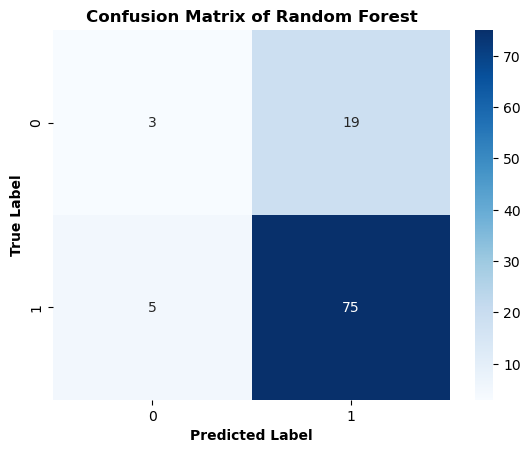

In [33]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)
for i in range(177):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=246)
#       print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
    
    model_rf=RandomForestClassifier(n_estimators=29,criterion='entropy')
    model_rf.fit(x_train,y_train)
    x_test_pred_rf=model_rf.predict(x_test) 
    acc_test=accuracy_score(y_test,x_test_pred_rf)
    x_train_pred_rf=model_rf.predict(x_train) 
    acc_train=accuracy_score(y_train,x_train_pred_rf)
    # if((acc_train>=0.77) & (acc_test>=0.75) & (acc_train>=acc_test)):
#     if(acc_test>=0.75):
        
print("TRAIN:",acc_train,"TEST:",acc_test)
 
precision_rf=precision_score(y_test,y_predicted_test)
recall_rf=recall_score(y_test,y_predicted_test)
f1_rf=f1_score(y_test,y_predicted_test)

print("precision:",precision_rf)
print("recall:",recall_rf)
print("f1:",f1_rf)

# y_pred_rf=model_rf.decision_function(x_test)
probs_rf=model_rf.predict_proba(x_test)



#---->
cm_test_rf=confusion_matrix(y_test,x_test_pred_rf)
cm_train_rf=confusion_matrix(y_train,x_train_pred_rf)

print("TRAIN:",cm_train_rf,"\n TEST:",cm_test_rf)
#---->
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_rf,cmap="Blues",annot=True,
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Random Forest",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

In [116]:
# 0 246 143 TRAIN: 0.8943488943488943 TEST: 0.7647058823529411
# 2 246 134 TRAIN: 0.8943488943488943 TEST: 0.7647058823529411
# 1 159 60 TRAIN: 0.8943488943488943 TEST: 0.7549019607843137
# 1 246 29 TRAIN: 0.8943488943488943 TEST: 0.7647058823529411

# 6 129 27 TRAIN: 0.8894348894348895 TEST: 0.7745098039215687

# 15 8 41 TRAIN: 0.8869778869778869 TEST: 0.7745098039215687

# 2 246 45 TRAIN: 0.8943488943488943 TEST: 0.7549019607843137
# 5 246 39 TRAIN: 0.8943488943488943 TEST: 0.7549019607843137

# 6 128 78 TRAIN: 0.9017199017199017 TEST: 0.7647058823529411


from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=246)
#       print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
    
model_rf=RandomForestClassifier(n_estimators=143,criterion='gini')
model_rf.fit(x_train,y_train)
x_test_pred_rf=model_rf.predict(x_test) 
acc_test=accuracy_score(y_test,x_test_pred_rf)
x_train_pred_rf=model_rf.predict(x_train) 
acc_train=accuracy_score(y_train,x_train_pred_rf)
# if((acc_train>=0.77) & (acc_test>=0.75) & (acc_train>=acc_test)):
print("TRAIN:",acc_train,"TEST:",acc_test)
 
precision_rf=precision_score(y_test,y_predicted_test)
recall_rf=recall_score(y_test,y_predicted_test)
f1_rf=f1_score(y_test,y_predicted_test)

print("precision:",precision_rf)
print("recall:",recall_rf)
print("f1:",f1_rf)

#--->
# probs_rf=model_rf.predict_proba(x_test)

TRAIN: 0.8943488943488943 TEST: 0.7254901960784313
precision: 0.7777777777777778
recall: 0.875
f1: 0.823529411764706


In [480]:


from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)
for i in range(300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=246)
#       print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
    
    model_rf=RandomForestClassifier(n_estimators=29,criterion='entropy')
    model_rf.fit(x_train,y_train)
    x_test_pred_rf=model_rf.predict(x_test) 
    acc_test=accuracy_score(y_test,x_test_pred_rf)
    x_train_pred_rf=model_rf.predict(x_train) 
    acc_train=accuracy_score(y_train,x_train_pred_rf)
    # if((acc_train>=0.77) & (acc_test>=0.75) & (acc_train>=acc_test)):
    if(acc_test>=0.75):
        print(i,"TRAIN:",acc_train,"TEST:",acc_test)
 

41 TRAIN: 0.8943488943488943 TEST: 0.7549019607843137
74 TRAIN: 0.8894348894348895 TEST: 0.7549019607843137
100 TRAIN: 0.8943488943488943 TEST: 0.7549019607843137
148 TRAIN: 0.8943488943488943 TEST: 0.7549019607843137
151 TRAIN: 0.8943488943488943 TEST: 0.7549019607843137
176 TRAIN: 0.8869778869778869 TEST: 0.7647058823529411
201 TRAIN: 0.8943488943488943 TEST: 0.7549019607843137
247 TRAIN: 0.8918918918918919 TEST: 0.7647058823529411


In [444]:
cm_test=confusion_matrix(y_test,x_test_pred_rf)
cm_train=confusion_matrix(y_train,x_train_pred_rf)

print("TRAIN:",cm_train,"\n TEST:",cm_test)

TRAIN: [[ 93  29]
 [ 16 269]] 
 TEST: [[ 5 17]
 [11 69]]


In [487]:
from sklearn.model_selection import ShuffleSplit
for i in range(2,20):
    s_split=ShuffleSplit(n_splits=i,test_size=0.2,random_state=246)
    score=cross_val_score(model_rf,x,y,cv=s_split).mean()
    print(i,score)

2 0.6666666666666667
3 0.6470588235294118
4 0.6397058823529411
5 0.6431372549019608
6 0.6454248366013072
7 0.6400560224089636
8 0.6458333333333333
9 0.6481481481481481
10 0.6362745098039216
11 0.6283422459893048
12 0.6249999999999999
13 0.636500754147813
14 0.6365546218487396
15 0.6287581699346404
16 0.6225490196078431
17 0.6280276816608996
18 0.6258169934640523
19 0.6367389060887512


### LINEAR REGRESSION__________>>>>>>

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

score=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

x=data.drop(columns=['Sample labelling in Record Book','Rotavirus (+ve/-ve) by ELISA'],axis=1)
y=data['Rotavirus (+ve/-ve) by ELISA']

for i in range(300):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    
    model = LinearRegression()
    model.fit(x_train, y_train)

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Convert predictions to binary values (0 and 1) using a threshold
    for j in score:
        threshold = j
        y_pred_train_binary = [1 if pred >= threshold else 0 for pred in y_pred_train]
        y_pred_test_binary = [1 if pred >= threshold else 0 for pred in y_pred_test]

        acc_train = accuracy_score(y_train, y_pred_train_binary)
        acc_test = accuracy_score(y_test, y_pred_test_binary)
        if((acc_train>=acc_test)&(acc_test>=0.7)&(acc_train>=0.72)):
        
            print(i,j,"TRAIN:",acc_train,"TEST:", acc_test)


14 0.6 TRAIN: 0.7272727272727273 TEST: 0.7156862745098039
30 0.5 TRAIN: 0.7223587223587223 TEST: 0.7058823529411765
64 0.5 TRAIN: 0.7272727272727273 TEST: 0.7058823529411765
90 0.6 TRAIN: 0.7272727272727273 TEST: 0.7058823529411765
94 0.6 TRAIN: 0.7346437346437347 TEST: 0.7156862745098039
108 0.5 TRAIN: 0.7223587223587223 TEST: 0.7058823529411765
111 0.6 TRAIN: 0.7248157248157249 TEST: 0.7058823529411765
193 0.6 TRAIN: 0.7223587223587223 TEST: 0.7058823529411765
195 0.6 TRAIN: 0.7223587223587223 TEST: 0.7156862745098039
219 0.5 TRAIN: 0.7272727272727273 TEST: 0.7156862745098039
239 0.5 TRAIN: 0.7272727272727273 TEST: 0.7058823529411765
270 0.6 TRAIN: 0.7223587223587223 TEST: 0.7058823529411765
295 0.5 TRAIN: 0.7223587223587223 TEST: 0.7156862745098039
299 0.6 TRAIN: 0.7223587223587223 TEST: 0.7058823529411765


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x=data.drop(columns=['Sample labelling in Record Book','Rotavirus (+ve/-ve) by ELISA'],axis=1)
y=data['Rotavirus (+ve/-ve) by ELISA']
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=94)
    
model = LinearRegression()
model.fit(x_train, y_train)

model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Convert predictions to binary values (0 and 1) using a threshold

threshold = 0.6
y_pred_train_binary = [1 if pred >= threshold else 0 for pred in y_pred_train]
y_pred_test_binary = [1 if pred >= threshold else 0 for pred in y_pred_test]

acc_train = accuracy_score(y_train, y_pred_train_binary)
acc_test = accuracy_score(y_test, y_pred_test_binary)
# if((acc_train>=acc_test)&(acc_test>=0.7)&(acc_train>=0.72)):
        
print("TRAIN:",acc_train,"TEST:", acc_test)

precision_linar_r=precision_score(y_test,y_predicted_test)
recall_linar_r=recall_score(y_test,y_predicted_test)
f1_linar_r=f1_score(y_test,y_predicted_test)

print("precision:",precision_linar_r)
print("recall:",recall_linar_r)
print("f1:",f1_linar_r)



TRAIN: 0.7346437346437347 TEST: 0.7156862745098039
precision: 0.686046511627907
recall: 0.8194444444444444
f1: 0.7468354430379746


In [59]:
cm_test_lr=confusion_matrix(y_train, y_pred_train_binary)
cm_train_lr=confusion_matrix(y_test, y_pred_test_binary)

print("TRAIN:",cm_train_lr,"\n TEST:",cm_test_lr)

TRAIN: [[ 2 28]
 [ 1 71]] 
 TEST: [[ 10 104]
 [  4 289]]


Text(0.5, 1.0, 'Confusion Matrix of Linear Regression')

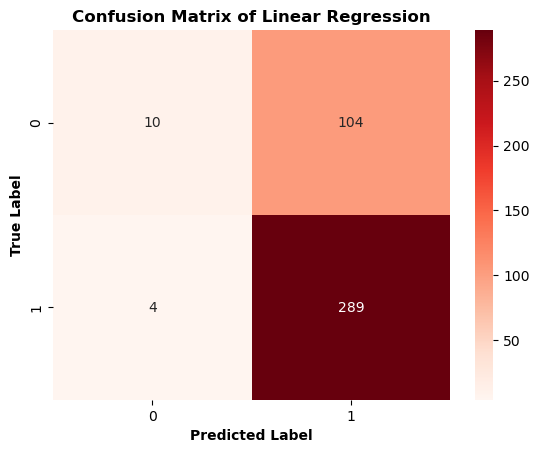

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_lr,cmap="Reds",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of Linear Regression",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

### Repeated random train test split ---> ShaffleSplit
##### hybrid of train_test_splt and KFold cross validatiion method { best one }

In [121]:
from sklearn.model_selection import ShuffleSplit
for i in range(2,20):
    s_split=ShuffleSplit(n_splits=i,test_size=0.2,random_state=246)
    score=cross_val_score(model_rf,x,y,cv=s_split).mean()
    print(i,score)

2 0.6715686274509804
3 0.6666666666666666
4 0.6593137254901961
5 0.6450980392156863
6 0.6535947712418301
7 0.6442577030812325
8 0.6470588235294117
9 0.6470588235294117
10 0.6382352941176469
11 0.640819964349376
12 0.6397058823529412
13 0.6357466063348416
14 0.6351540616246497
15 0.633986928104575
16 0.6317401960784313
17 0.637831603229527
18 0.6356209150326797
19 0.6377708978328173


### XGBOOST______>>>

TEST: 0.7647058823529411 TRAIN: 0.7764127764127764
precision: 0.8152173913043478
recall: 0.9146341463414634
f1: 0.8620689655172414
TRAIN: [[ 3 17]
 [ 7 75]] 
 TEST: [[ 41  83]
 [  8 275]]


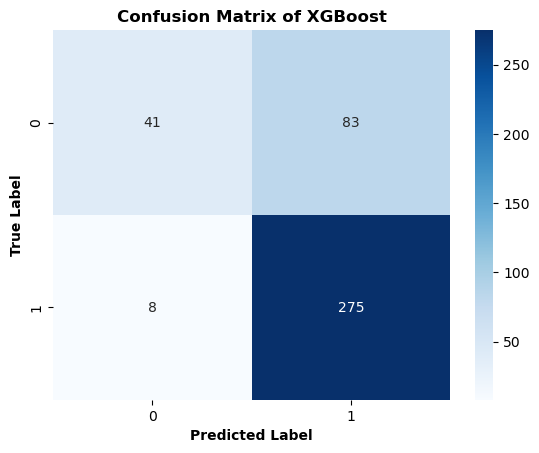

In [34]:
import xgboost as xgb

model_xgb=xgb.XGBClassifier(n_estimators=105,learning_rate=0.04)
   
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=243)
model_xgb.fit(x_train,y_train)
y_pred_train_xgb=model_xgb.predict(x_train)
acc_train=accuracy_score(y_train,y_pred_train_xgb)

y_pred_test_xgb=model_xgb.predict(x_test)
acc_test=accuracy_score(y_test,y_pred_test_xgb)
    
#         if((acc_train>=acc_test)&(acc_test>=0.7)):
print("TEST:",acc_test,"TRAIN:",acc_train)

precision_xgb=precision_score(y_test,y_pred_test_xgb)
recall_xgb=recall_score(y_test,y_pred_test_xgb)
f1_xgb=f1_score(y_test,y_pred_test_xgb)

print("precision:",precision_xgb)
print("recall:",recall_xgb)
print("f1:",f1_xgb)

# y_pred_xgb=model_xgb.decision_function(x_test)
probs_xgb=model_xgb.predict_proba(x_test)


#---->
cm_test_xgb=confusion_matrix(y_train, y_pred_train_xgb)
cm_train_xgb=confusion_matrix(y_test, y_pred_test_xgb)

print("TRAIN:",cm_train_xgb,"\n TEST:",cm_test_xgb)
#---->

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_xgb,cmap="Blues",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of XGBoost",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
plt.show()

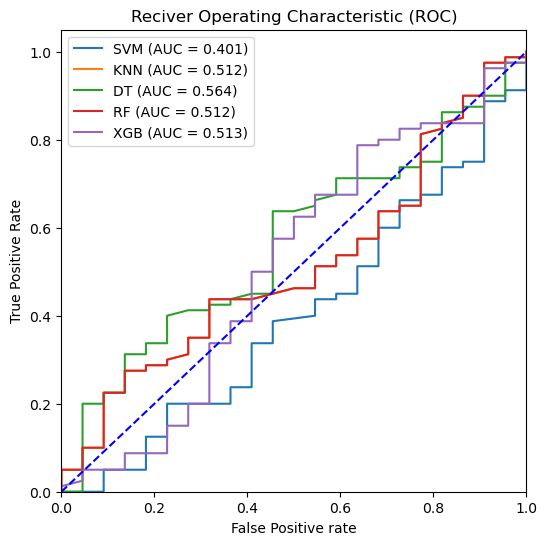

In [120]:
from sklearn.metrics import roc_curve,auc

# y_scores=model_xgb.predict_proba(x_test)[:,1]
svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_pred_svm)
auc_svm=auc(svm_fpr,svm_tpr)

knn_fpr,knn_tpr,threshold=roc_curve(y_test,y_pred_knn)
auc_knn=auc(knn_fpr,knn_tpr)

dt_fpr,dt_tpr,threshold=roc_curve(y_test,y_pred_dt)
auc_dt=auc(dt_fpr,dt_tpr)

rf_fpr,rf_tpr,threshold=roc_curve(y_test,y_pred_rf)
auc_rf=auc(rf_fpr,rf_tpr)

xgb_fpr,xgb_tpr,threshold=roc_curve(y_test,y_pred_xgb)
auc_xgb=auc(xgb_fpr,xgb_tpr)

plt.figure(figsize=(6,6),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle='-',label='SVM (AUC = %0.3f)' % auc_svm)
plt.plot(knn_fpr,knn_tpr,linestyle='-',label='KNN (AUC = %0.3f)' % auc_knn)
plt.plot(dt_fpr,dt_tpr,linestyle='-',label='DT (AUC = %0.3f)' % auc_dt)
plt.plot(rf_fpr,rf_tpr,linestyle='-',label='RF (AUC = %0.3f)' % auc_rf)
plt.plot(xgb_fpr,xgb_tpr,linestyle='-',label='XGB (AUC = %0.3f)' % auc_xgb)



# plt.plot(fpr,tpr,label='ROC curve (area= %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.title('Reciver Operating Characteristic (ROC)')

plt.legend()

plt.show()


In [51]:
from sklearn.metrics import roc_curve,auc

# y_scores=model_xgb.predict_proba(x_test)[:,1]
probs_rf_1=probs_rf[:,1]
probs_dt_1=probs_dt[:,1]
probs_naive_1=probs_naive[:,1]
probs_xgb_1=probs_xgb[:,1]


auc_rf=roc_auc_score(y_test,probs_rf_1)
auc_dt=roc_auc_score(y_test,probs_dt_1)
auc_naive=roc_auc_score(y_test,probs_naive_1)
auc_xgb=roc_auc_score(y_test,probs_xgb_1)


svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_pred_svm)
auc_svm=auc(svm_fpr,svm_tpr)

knn_fpr,knn_tpr,threshold=roc_curve(y_test,y_pred_knn)
# auc_knn=auc(knn_fpr,knn_tpr)

dt_fpr,dt_tpr,threshold=roc_curve(y_test,y_pred_dt)
# auc_dt=auc(dt_fpr,dt_tpr)

rf_fpr,rf_tpr,threshold=roc_curve(y_test,y_pred_rf)
# auc_rf=auc(rf_fpr,rf_tpr)

xgb_fpr,xgb_tpr,threshold=roc_curve(y_test,y_pred_xgb)
# auc_xgb=auc(xgb_fpr,xgb_tpr)

plt.figure(figsize=(6,6),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle='-',label='SVM (AUC = %0.3f)' % auc_svm)
plt.plot(knn_fpr,knn_tpr,linestyle='-',label='KNN (AUC = %0.3f)' % auc_knn)
plt.plot(dt_fpr,dt_tpr,linestyle='-',label='DT (AUC = %0.3f)' % auc_dt)
plt.plot(rf_fpr,rf_tpr,linestyle='-',label='RF (AUC = %0.3f)' % auc_rf)
plt.plot(xgb_fpr,xgb_tpr,linestyle='-',label='XGB (AUC = %0.3f)' % auc_xgb)



# plt.plot(fpr,tpr,label='ROC curve (area= %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],'b--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive rate')
plt.ylabel('True Positive Rate')
plt.title('Reciver Operating Characteristic (ROC)')

plt.legend()

plt.show()


NameError: name 'y_pred_knn' is not defined

In [50]:
from sklearn.preprocessing import label_binarize

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

fpr={}
tpr={}
thresh={}
roc_auc= dict()

n_class=classes.shape[0]


for i in range(n_class):
    fpr[i],tpr[i],thres[i]=roc_curve[y_test_binarized[:,1],pred_prob[:,i]]
    roc_auc[i]=auc(fpr[i],tpr[i])
    
    plt.plot(fpr[i],tpr[i],linestyle='--',label='%s vs Rest (AUC=%0.2f)'%(classes[:,i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title("Multiclass ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


NameError: name 'classes' is not defined

In [52]:
cm_test_xgb=confusion_matrix(y_train, y_pred_train)
cm_train_xgb=confusion_matrix(y_test, y_pred_test)

print("TRAIN:",cm_train,"\n TEST:",cm_test)

TRAIN: [[  0 115]
 [  0 292]] 
 TEST: [[ 0 29]
 [ 0 73]]


Text(0.5, 1.0, 'Confusion Matrix of XGBoost')

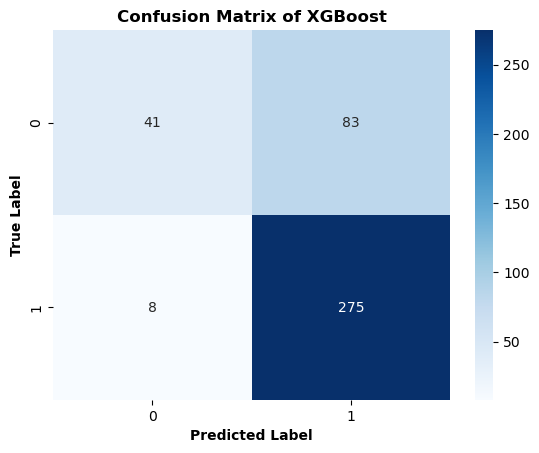

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm_test_xgb,cmap="Blues",annot=True,fmt='d',
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted Label",fontweight='bold')
plt.ylabel("True Label",fontweight='bold')
plt.title("Confusion Matrix of XGBoost",fontweight='bold')

# disp = plot_confusion_matrix(classifier,x_test,y_test)
# disp.ax_.set_title("Confusion Matrix")

# # Customize the color map for better visualization (optional)
# plt.cm.get_cmap('Blues')

# # Display the plot
# plt.show()

### Repeated random train test split ---> ShaffleSplit
##### hybrid of train_test_splt and KFold cross validatiion method { best one }

In [126]:
from sklearn.model_selection import ShuffleSplit
for i in range(2,20):
    s_split=ShuffleSplit(n_splits=i,test_size=0.2,random_state=243)
    score=cross_val_score(model_xgb,x,y,cv=s_split).mean()
    print(i,score)

2 0.7254901960784313
3 0.7058823529411765
4 0.6936274509803921
5 0.692156862745098
6 0.6830065359477123
7 0.680672268907563
8 0.6715686274509803
9 0.6721132897603486
10 0.6598039215686274
11 0.6568627450980391
12 0.6584967320261438
13 0.6636500754147813
14 0.6638655462184874
15 0.6627450980392156
16 0.6636029411764706
17 0.6649365628604382
18 0.6661220043572984
19 0.6682146542827656


In [136]:
# 2 230 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543


# 4 35 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
# 20 166 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543

# 11 35 TEST: 0.7450980392156863 TRAIN: 0.7592137592137592
# 11 72 TEST: 0.7450980392156863 TRAIN: 0.7592137592137592

# 16 35 TEST: 0.7450980392156863 TRAIN: 0.7641277641277642
# 21 35 TEST: 0.7450980392156863 TRAIN: 0.7665847665847666
# 32 147 TEST: 0.7549019607843137 TRAIN: 0.7567567567567568

# 19 35 TEST: 0.7450980392156863 TRAIN: 0.769041769041769

# 28 133 TEST: 0.7549019607843137 TRAIN: 0.7567567567567568
# 35 166 TEST: 0.7549019607843137 TRAIN: 0.7592137592137592


# 31 245 TEST: 0.7549019607843137 TRAIN: 0.7616707616707616
# 32 245 TEST: 0.7549019607843137 TRAIN: 0.7616707616707616

# 104 223 TEST: 0.7549019607843137 TRAIN: 0.7714987714987716

# 145 115 TEST: 0.7647058823529411 TRAIN: 0.7665847665847666
# 146 115 TEST: 0.7647058823529411 TRAIN: 0.7665847665847666

# 110 11 TEST: 0.7647058823529411 TRAIN: 0.7714987714987716



# 105 243 TEST: 0.7647058823529411 TRAIN: 0.7764127764127764
# 105 243 TEST: 0.7647058823529411 TRAIN: 0.7764127764127764

# 191 246 TEST: 0.7549019607843137 TRAIN: 0.7813267813267813
import xgboost as xgb

for i in range(300):
    model_xgb=xgb.XGBClassifier(n_estimators=i,learning_rate=0.04)
    for j in range(300):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=j)
        model_xgb.fit(x_train,y_train)
        y_pred_train=model_xgb.predict(x_train)
        acc_train=accuracy_score(y_train,y_pred_train)

        y_pred_test=model_xgb.predict(x_test)
        acc_test=accuracy_score(y_test,y_pred_test)
    
        if((acc_train>=acc_test)&(acc_test>=0.7)):
            print(i,j,"TEST:",acc_test,"TRAIN:",acc_train)

1 12 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
1 19 TEST: 0.7058823529411765 TRAIN: 0.7444717444717445
1 27 TEST: 0.7254901960784313 TRAIN: 0.7321867321867321
1 35 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
1 40 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
1 41 TEST: 0.7058823529411765 TRAIN: 0.742014742014742
1 44 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
1 51 TEST: 0.7058823529411765 TRAIN: 0.7395577395577395
1 54 TEST: 0.7058823529411765 TRAIN: 0.7444717444717445
1 75 TEST: 0.7156862745098039 TRAIN: 0.7346437346437347
1 79 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
1 81 TEST: 0.7352941176470589 TRAIN: 0.742014742014742
1 86 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
1 93 TEST: 0.7254901960784313 TRAIN: 0.7371007371007371
1 96 TEST: 0.7352941176470589 TRAIN: 0.742014742014742
1 110 TEST: 0.7352941176470589 TRAIN: 0.7395577395577395
1 121 TEST: 0.7254901960784313 TRAIN: 0.7346437346437347
1 122 TEST: 0.7352941176470589 TRAIN: 0.742014742

4 70 TEST: 0.7058823529411765 TRAIN: 0.7444717444717445
4 79 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
4 81 TEST: 0.7352941176470589 TRAIN: 0.742014742014742
4 86 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
4 93 TEST: 0.7254901960784313 TRAIN: 0.7346437346437347
4 96 TEST: 0.7352941176470589 TRAIN: 0.742014742014742
4 97 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
4 106 TEST: 0.7156862745098039 TRAIN: 0.7321867321867321
4 108 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
4 110 TEST: 0.7156862745098039 TRAIN: 0.742014742014742
4 116 TEST: 0.7156862745098039 TRAIN: 0.7321867321867321
4 119 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
4 121 TEST: 0.7352941176470589 TRAIN: 0.7371007371007371
4 129 TEST: 0.7254901960784313 TRAIN: 0.7371007371007371
4 135 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
4 145 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
4 147 TEST: 0.7254901960784313 TRAIN: 0.7395577395577395
4 148 TEST: 0.7450980392156863 TRAIN: 0.75

6 271 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
6 287 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
7 9 TEST: 0.7352941176470589 TRAIN: 0.7444717444717445
7 19 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
7 25 TEST: 0.7352941176470589 TRAIN: 0.7395577395577395
7 35 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
7 40 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
7 44 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
7 45 TEST: 0.7254901960784313 TRAIN: 0.7395577395577395
7 51 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
7 57 TEST: 0.7156862745098039 TRAIN: 0.742014742014742
7 69 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
7 72 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
7 76 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
7 81 TEST: 0.7254901960784313 TRAIN: 0.7395577395577395
7 84 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
7 86 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
7 96 TEST: 0.7352941176470589 TRAIN: 0.7395577395

9 165 TEST: 0.7450980392156863 TRAIN: 0.7518427518427518
9 166 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
9 176 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
9 193 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
9 194 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
9 197 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
9 215 TEST: 0.7254901960784313 TRAIN: 0.7444717444717445
9 223 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
9 230 TEST: 0.7352941176470589 TRAIN: 0.7493857493857494
9 232 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
9 237 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
9 244 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
9 246 TEST: 0.7450980392156863 TRAIN: 0.7469287469287469
9 248 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
9 249 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
9 261 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
9 263 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
9 267 TEST: 0.7058823529411765 T

12 6 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
12 17 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
12 19 TEST: 0.7352941176470589 TRAIN: 0.7469287469287469
12 25 TEST: 0.7450980392156863 TRAIN: 0.7469287469287469
12 26 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
12 35 TEST: 0.7450980392156863 TRAIN: 0.7592137592137592
12 37 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
12 39 TEST: 0.7156862745098039 TRAIN: 0.742014742014742
12 40 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
12 44 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
12 45 TEST: 0.7352941176470589 TRAIN: 0.7371007371007371
12 51 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
12 62 TEST: 0.7352941176470589 TRAIN: 0.7444717444717445
12 68 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
12 69 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
12 70 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
12 72 TEST: 0.7352941176470589 TRAIN: 0.7616707616707616
12 75 TEST: 0.7254901960784313 TRA

14 138 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
14 139 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
14 142 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
14 145 TEST: 0.7352941176470589 TRAIN: 0.7542997542997543
14 147 TEST: 0.7352941176470589 TRAIN: 0.742014742014742
14 148 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
14 154 TEST: 0.7254901960784313 TRAIN: 0.7371007371007371
14 160 TEST: 0.7058823529411765 TRAIN: 0.7395577395577395
14 161 TEST: 0.7156862745098039 TRAIN: 0.7395577395577395
14 165 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
14 166 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
14 176 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
14 193 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
14 194 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
14 195 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
14 197 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
14 215 TEST: 0.7450980392156863 TRAIN: 0.7493857493857494
14 223 TEST: 0.7

16 267 TEST: 0.7058823529411765 TRAIN: 0.7371007371007371
16 268 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
16 269 TEST: 0.7254901960784313 TRAIN: 0.7371007371007371
16 271 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
16 280 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
16 287 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
17 2 TEST: 0.7156862745098039 TRAIN: 0.7371007371007371
17 4 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
17 8 TEST: 0.7254901960784313 TRAIN: 0.7395577395577395
17 25 TEST: 0.7352941176470589 TRAIN: 0.742014742014742
17 26 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
17 35 TEST: 0.7450980392156863 TRAIN: 0.7641277641277642
17 37 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
17 39 TEST: 0.7352941176470589 TRAIN: 0.742014742014742
17 40 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
17 44 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
17 55 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
17 57 TEST: 0.7450980392156863 

19 87 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
19 96 TEST: 0.7156862745098039 TRAIN: 0.742014742014742
19 106 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
19 108 TEST: 0.7254901960784313 TRAIN: 0.7395577395577395
19 110 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
19 116 TEST: 0.7352941176470589 TRAIN: 0.742014742014742
19 119 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
19 121 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
19 128 TEST: 0.7352941176470589 TRAIN: 0.7518427518427518
19 132 TEST: 0.7450980392156863 TRAIN: 0.7518427518427518
19 135 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
19 138 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
19 145 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
19 151 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
19 152 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
19 154 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
19 156 TEST: 0.7254901960784313 TRAIN: 0.7395577395577395
19 159 TEST: 0.70588

21 116 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
21 119 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
21 121 TEST: 0.7352941176470589 TRAIN: 0.7518427518427518
21 128 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
21 135 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
21 145 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
21 148 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
21 150 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
21 151 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
21 152 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
21 154 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
21 156 TEST: 0.7254901960784313 TRAIN: 0.7346437346437347
21 159 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
21 165 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
21 166 TEST: 0.7450980392156863 TRAIN: 0.7592137592137592
21 176 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
21 193 TEST: 0.7352941176470589 TRAIN: 0.7469287469287469
21 194 TEST: 0.

23 116 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
23 121 TEST: 0.7352941176470589 TRAIN: 0.7444717444717445
23 128 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
23 129 TEST: 0.7450980392156863 TRAIN: 0.7469287469287469
23 132 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
23 135 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
23 145 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
23 147 TEST: 0.7450980392156863 TRAIN: 0.7493857493857494
23 148 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
23 150 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
23 151 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
23 152 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
23 154 TEST: 0.7352941176470589 TRAIN: 0.742014742014742
23 156 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
23 159 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
23 160 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
23 165 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
23 177 TEST: 0.7

25 96 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
25 98 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
25 108 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
25 116 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
25 121 TEST: 0.7352941176470589 TRAIN: 0.7493857493857494
25 128 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
25 129 TEST: 0.7450980392156863 TRAIN: 0.7493857493857494
25 132 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
25 135 TEST: 0.7352941176470589 TRAIN: 0.7542997542997543
25 145 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
25 147 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
25 150 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
25 151 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
25 152 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
25 154 TEST: 0.7352941176470589 TRAIN: 0.7444717444717445
25 156 TEST: 0.7156862745098039 TRAIN: 0.742014742014742
25 159 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
25 160 TEST: 0.705

27 110 TEST: 0.7450980392156863 TRAIN: 0.7469287469287469
27 116 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
27 121 TEST: 0.7352941176470589 TRAIN: 0.7518427518427518
27 128 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
27 130 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
27 132 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
27 135 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
27 139 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
27 145 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
27 147 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
27 151 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
27 152 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
27 154 TEST: 0.7352941176470589 TRAIN: 0.7395577395577395
27 156 TEST: 0.7156862745098039 TRAIN: 0.742014742014742
27 159 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
27 160 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
27 161 TEST: 0.7352941176470589 TRAIN: 0.7444717444717445
27 165 TEST: 0.

29 96 TEST: 0.7058823529411765 TRAIN: 0.7444717444717445
29 98 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
29 116 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
29 121 TEST: 0.7352941176470589 TRAIN: 0.7518427518427518
29 128 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
29 129 TEST: 0.7450980392156863 TRAIN: 0.7493857493857494
29 132 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
29 133 TEST: 0.7352941176470589 TRAIN: 0.7542997542997543
29 135 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
29 139 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
29 145 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
29 147 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
29 150 TEST: 0.7058823529411765 TRAIN: 0.7395577395577395
29 151 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
29 152 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
29 154 TEST: 0.7352941176470589 TRAIN: 0.7395577395577395
29 156 TEST: 0.7156862745098039 TRAIN: 0.742014742014742
29 159 TEST: 0.73

31 75 TEST: 0.7254901960784313 TRAIN: 0.7395577395577395
31 79 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
31 83 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
31 84 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
31 87 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
31 96 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
31 98 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
31 110 TEST: 0.7450980392156863 TRAIN: 0.7469287469287469
31 116 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
31 119 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
31 121 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
31 128 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
31 132 TEST: 0.7352941176470589 TRAIN: 0.7641277641277642
31 133 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
31 135 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
31 139 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
31 143 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
31 145 TEST: 0.715686

32 288 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
32 294 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
32 297 TEST: 0.7352941176470589 TRAIN: 0.7542997542997543
33 2 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
33 8 TEST: 0.7058823529411765 TRAIN: 0.7371007371007371
33 18 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
33 26 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
33 37 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
33 40 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
33 45 TEST: 0.7254901960784313 TRAIN: 0.7444717444717445
33 55 TEST: 0.7254901960784313 TRAIN: 0.7444717444717445
33 62 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
33 69 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
33 70 TEST: 0.7352941176470589 TRAIN: 0.7493857493857494
33 71 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
33 72 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
33 75 TEST: 0.7254901960784313 TRAIN: 0.7395577395577395
33 79 TEST: 0.7254901960784313

34 270 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
34 271 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
34 272 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
34 277 TEST: 0.7156862745098039 TRAIN: 0.7395577395577395
34 280 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
34 282 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
34 287 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
34 288 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
34 294 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
34 297 TEST: 0.7352941176470589 TRAIN: 0.7542997542997543
35 2 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
35 8 TEST: 0.7058823529411765 TRAIN: 0.7371007371007371
35 11 TEST: 0.7352941176470589 TRAIN: 0.7469287469287469
35 18 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
35 26 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
35 37 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
35 40 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
35 45 TEST: 0.73529411764

36 199 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
36 202 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
36 203 TEST: 0.7352941176470589 TRAIN: 0.7518427518427518
36 205 TEST: 0.7352941176470589 TRAIN: 0.7518427518427518
36 210 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
36 211 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
36 215 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
36 223 TEST: 0.7352941176470589 TRAIN: 0.7542997542997543
36 227 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
36 230 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
36 245 TEST: 0.7450980392156863 TRAIN: 0.7641277641277642
36 246 TEST: 0.7352941176470589 TRAIN: 0.7542997542997543
36 248 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
36 249 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
36 259 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
36 260 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
36 261 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
36 262 TEST: 0.

38 96 TEST: 0.7058823529411765 TRAIN: 0.7444717444717445
38 116 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
38 121 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
38 128 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
38 129 TEST: 0.7450980392156863 TRAIN: 0.7518427518427518
38 132 TEST: 0.7352941176470589 TRAIN: 0.7641277641277642
38 133 TEST: 0.7352941176470589 TRAIN: 0.7641277641277642
38 135 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
38 139 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
38 143 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
38 145 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
38 147 TEST: 0.7549019607843137 TRAIN: 0.7592137592137592
38 150 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
38 151 TEST: 0.7352941176470589 TRAIN: 0.7542997542997543
38 152 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
38 156 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
38 159 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
38 165 TEST: 0.7

39 277 TEST: 0.7254901960784313 TRAIN: 0.7346437346437347
39 280 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
39 282 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
39 287 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
39 288 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
39 294 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
39 295 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
39 297 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
40 2 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
40 8 TEST: 0.7058823529411765 TRAIN: 0.742014742014742
40 11 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
40 12 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
40 13 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
40 18 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
40 26 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
40 35 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
40 37 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
40 40 TEST: 0.71568627450980

41 159 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
41 165 TEST: 0.7352941176470589 TRAIN: 0.7493857493857494
41 168 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
41 171 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
41 174 TEST: 0.7156862745098039 TRAIN: 0.7837837837837838
41 176 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
41 177 TEST: 0.7254901960784313 TRAIN: 0.7321867321867321
41 184 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
41 187 TEST: 0.7156862745098039 TRAIN: 0.7837837837837838
41 189 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
41 193 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
41 194 TEST: 0.7254901960784313 TRAIN: 0.7616707616707616
41 197 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
41 199 TEST: 0.7254901960784313 TRAIN: 0.7665847665847666
41 202 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
41 203 TEST: 0.7352941176470589 TRAIN: 0.7493857493857494
41 205 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
41 208 TEST: 0

43 18 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
43 26 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
43 35 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
43 37 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
43 40 TEST: 0.7058823529411765 TRAIN: 0.7444717444717445
43 43 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
43 45 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
43 46 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
43 54 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
43 56 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
43 57 TEST: 0.7450980392156863 TRAIN: 0.7469287469287469
43 62 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
43 69 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
43 70 TEST: 0.7352941176470589 TRAIN: 0.7493857493857494
43 71 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
43 72 TEST: 0.7352941176470589 TRAIN: 0.7518427518427518
43 75 TEST: 0.7254901960784313 TRAIN: 0.7395577395577395
43 79 TEST: 0.7450980392156863 

44 199 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
44 202 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
44 203 TEST: 0.7352941176470589 TRAIN: 0.7493857493857494
44 205 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
44 208 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
44 210 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
44 211 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
44 215 TEST: 0.7254901960784313 TRAIN: 0.7665847665847666
44 217 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
44 223 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
44 227 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
44 230 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
44 245 TEST: 0.7352941176470589 TRAIN: 0.7641277641277642
44 246 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
44 248 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
44 249 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
44 255 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
44 259 TEST: 0.

46 75 TEST: 0.7254901960784313 TRAIN: 0.7395577395577395
46 79 TEST: 0.7450980392156863 TRAIN: 0.7518427518427518
46 83 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
46 84 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
46 86 TEST: 0.7352941176470589 TRAIN: 0.7395577395577395
46 87 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
46 96 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
46 97 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
46 98 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
46 116 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
46 121 TEST: 0.7352941176470589 TRAIN: 0.7518427518427518
46 122 TEST: 0.7450980392156863 TRAIN: 0.7493857493857494
46 128 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
46 129 TEST: 0.7352941176470589 TRAIN: 0.7444717444717445
46 132 TEST: 0.7352941176470589 TRAIN: 0.769041769041769
46 133 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
46 135 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
46 144 TEST: 0.7156862745

47 249 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
47 259 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
47 260 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
47 261 TEST: 0.7058823529411765 TRAIN: 0.742014742014742
47 262 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
47 263 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
47 265 TEST: 0.7352941176470589 TRAIN: 0.7616707616707616
47 267 TEST: 0.7058823529411765 TRAIN: 0.7346437346437347
47 268 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
47 269 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
47 270 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
47 271 TEST: 0.7058823529411765 TRAIN: 0.7813267813267813
47 272 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
47 277 TEST: 0.7156862745098039 TRAIN: 0.742014742014742
47 280 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
47 282 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
47 287 TEST: 0.7156862745098039 TRAIN: 0.742014742014742
47 288 TEST: 0.7058

49 132 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
49 133 TEST: 0.7352941176470589 TRAIN: 0.769041769041769
49 135 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
49 144 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
49 145 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
49 147 TEST: 0.7450980392156863 TRAIN: 0.7616707616707616
49 151 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
49 152 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
49 154 TEST: 0.7450980392156863 TRAIN: 0.7469287469287469
49 156 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
49 158 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
49 159 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
49 160 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
49 171 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
49 174 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
49 176 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
49 177 TEST: 0.7254901960784313 TRAIN: 0.7321867321867321
49 184 TEST: 0.

51 2 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
51 8 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
51 17 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
51 19 TEST: 0.7450980392156863 TRAIN: 0.7493857493857494
51 25 TEST: 0.7254901960784313 TRAIN: 0.7444717444717445
51 26 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
51 35 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
51 37 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
51 40 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
51 42 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
51 45 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
51 54 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
51 55 TEST: 0.7352941176470589 TRAIN: 0.7469287469287469
51 56 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
51 57 TEST: 0.7450980392156863 TRAIN: 0.7493857493857494
51 62 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
51 70 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
51 71 TEST: 0.7156862745098039 TR

52 227 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
52 230 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
52 232 TEST: 0.7156862745098039 TRAIN: 0.7371007371007371
52 235 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
52 245 TEST: 0.7450980392156863 TRAIN: 0.7641277641277642
52 248 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
52 249 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
52 259 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
52 261 TEST: 0.7058823529411765 TRAIN: 0.7444717444717445
52 263 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
52 265 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
52 267 TEST: 0.7058823529411765 TRAIN: 0.7346437346437347
52 268 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
52 269 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
52 270 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
52 272 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
52 277 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
52 280 TEST: 0.

54 151 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
54 152 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
54 156 TEST: 0.7058823529411765 TRAIN: 0.7444717444717445
54 158 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
54 159 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
54 168 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
54 171 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
54 174 TEST: 0.7058823529411765 TRAIN: 0.7813267813267813
54 176 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
54 184 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
54 187 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
54 189 TEST: 0.7058823529411765 TRAIN: 0.7444717444717445
54 193 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
54 194 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
54 197 TEST: 0.7254901960784313 TRAIN: 0.7665847665847666
54 202 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
54 203 TEST: 0.7352941176470589 TRAIN: 0.7518427518427518
54 205 TEST: 0.

56 49 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
56 54 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
56 55 TEST: 0.7352941176470589 TRAIN: 0.7493857493857494
56 56 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
56 57 TEST: 0.7450980392156863 TRAIN: 0.7493857493857494
56 62 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
56 70 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
56 71 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
56 73 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
56 75 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
56 79 TEST: 0.7450980392156863 TRAIN: 0.7518427518427518
56 86 TEST: 0.7254901960784313 TRAIN: 0.7395577395577395
56 87 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
56 96 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
56 98 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
56 116 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
56 121 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
56 122 TEST: 0.7450980392156863

57 232 TEST: 0.7156862745098039 TRAIN: 0.7371007371007371
57 235 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
57 237 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
57 245 TEST: 0.7450980392156863 TRAIN: 0.7665847665847666
57 248 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
57 259 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
57 261 TEST: 0.7058823529411765 TRAIN: 0.742014742014742
57 263 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
57 264 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
57 265 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
57 267 TEST: 0.7156862745098039 TRAIN: 0.7371007371007371
57 268 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
57 269 TEST: 0.7254901960784313 TRAIN: 0.742014742014742
57 270 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
57 272 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
57 277 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
57 280 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
57 282 TEST: 0.7058

59 121 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
59 122 TEST: 0.7549019607843137 TRAIN: 0.7567567567567568
59 125 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
59 128 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
59 129 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
59 132 TEST: 0.7352941176470589 TRAIN: 0.7641277641277642
59 133 TEST: 0.7352941176470589 TRAIN: 0.773955773955774
59 135 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
59 145 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
59 147 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
59 151 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
59 152 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
59 156 TEST: 0.7058823529411765 TRAIN: 0.742014742014742
59 158 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
59 159 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
59 168 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
59 176 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
59 177 TEST: 0.735

60 277 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
60 280 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
60 282 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
60 287 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
60 288 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
60 294 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
60 296 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
60 297 TEST: 0.7352941176470589 TRAIN: 0.7616707616707616
61 2 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
61 8 TEST: 0.7058823529411765 TRAIN: 0.7444717444717445
61 18 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
61 19 TEST: 0.7450980392156863 TRAIN: 0.7518427518427518
61 25 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
61 35 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
61 37 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
61 38 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
61 40 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
61 42 TEST: 0.705882352941

62 174 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
62 176 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
62 177 TEST: 0.7352941176470589 TRAIN: 0.7395577395577395
62 184 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
62 187 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
62 189 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
62 193 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
62 194 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
62 197 TEST: 0.7254901960784313 TRAIN: 0.7665847665847666
62 199 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
62 202 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
62 203 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
62 205 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
62 208 TEST: 0.7450980392156863 TRAIN: 0.7592137592137592
62 210 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
62 211 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
62 214 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
62 215 TEST: 0.

64 54 TEST: 0.7058823529411765 TRAIN: 0.7444717444717445
64 55 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
64 56 TEST: 0.7352941176470589 TRAIN: 0.7714987714987716
64 57 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
64 62 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
64 70 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
64 71 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
64 73 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
64 75 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
64 79 TEST: 0.7549019607843137 TRAIN: 0.7567567567567568
64 81 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
64 86 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
64 87 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
64 93 TEST: 0.7352941176470589 TRAIN: 0.7493857493857494
64 94 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
64 98 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
64 116 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
64 119 TEST: 0.705882352941176

65 211 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
65 214 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
65 215 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
65 223 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
65 227 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
65 230 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
65 232 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
65 235 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
65 245 TEST: 0.7549019607843137 TRAIN: 0.7616707616707616
65 247 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
65 248 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
65 259 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
65 261 TEST: 0.7058823529411765 TRAIN: 0.742014742014742
65 263 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
65 265 TEST: 0.7254901960784313 TRAIN: 0.7616707616707616
65 267 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
65 268 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
65 269 TEST: 0.

67 84 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
67 86 TEST: 0.7254901960784313 TRAIN: 0.7444717444717445
67 87 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
67 93 TEST: 0.7450980392156863 TRAIN: 0.7493857493857494
67 94 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
67 98 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
67 116 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
67 119 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
67 121 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
67 122 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
67 128 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
67 129 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
67 132 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
67 133 TEST: 0.7450980392156863 TRAIN: 0.773955773955774
67 135 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
67 144 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
67 145 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
67 147 TEST: 0.735294117

68 259 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
68 261 TEST: 0.7058823529411765 TRAIN: 0.742014742014742
68 263 TEST: 0.7254901960784313 TRAIN: 0.7444717444717445
68 265 TEST: 0.7254901960784313 TRAIN: 0.7616707616707616
68 267 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
68 268 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
68 269 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
68 270 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
68 272 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
68 277 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
68 280 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
68 282 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
68 287 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
68 288 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
68 294 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
68 296 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
68 297 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
69 2 TEST: 0.71

70 128 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
70 129 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
70 132 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
70 133 TEST: 0.7450980392156863 TRAIN: 0.773955773955774
70 135 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
70 143 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
70 144 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
70 145 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
70 147 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
70 151 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
70 152 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
70 156 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
70 159 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
70 160 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
70 161 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
70 165 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
70 168 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
70 171 TEST: 0.7

71 287 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
71 288 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
71 294 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
71 296 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
71 297 TEST: 0.7254901960784313 TRAIN: 0.7616707616707616
72 2 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
72 8 TEST: 0.7156862745098039 TRAIN: 0.7469287469287469
72 9 TEST: 0.7450980392156863 TRAIN: 0.7493857493857494
72 17 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
72 18 TEST: 0.7254901960784313 TRAIN: 0.7813267813267813
72 19 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
72 25 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
72 35 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
72 37 TEST: 0.7352941176470589 TRAIN: 0.769041769041769
72 38 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
72 40 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
72 45 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
72 48 TEST: 0.7058823529411765 

73 165 TEST: 0.7352941176470589 TRAIN: 0.7542997542997543
73 171 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
73 176 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
73 177 TEST: 0.7352941176470589 TRAIN: 0.742014742014742
73 184 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
73 187 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
73 189 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
73 193 TEST: 0.7254901960784313 TRAIN: 0.7616707616707616
73 194 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
73 197 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
73 199 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
73 202 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
73 203 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
73 205 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
73 208 TEST: 0.7450980392156863 TRAIN: 0.7616707616707616
73 211 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
73 214 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
73 215 TEST: 0.72

75 57 TEST: 0.7450980392156863 TRAIN: 0.7592137592137592
75 62 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
75 70 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
75 71 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
75 72 TEST: 0.7450980392156863 TRAIN: 0.7518427518427518
75 73 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
75 75 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
75 79 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
75 84 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
75 86 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
75 87 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
75 93 TEST: 0.7450980392156863 TRAIN: 0.7518427518427518
75 94 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
75 110 TEST: 0.7352941176470589 TRAIN: 0.7616707616707616
75 116 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
75 119 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
75 121 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
75 128 TEST: 0.715686274509803

76 265 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
76 267 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
76 268 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
76 269 TEST: 0.7156862745098039 TRAIN: 0.7444717444717445
76 270 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
76 272 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
76 280 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
76 287 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
76 288 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
76 294 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
76 296 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
76 297 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
77 2 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
77 8 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
77 9 TEST: 0.7450980392156863 TRAIN: 0.7493857493857494
77 17 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
77 18 TEST: 0.7254901960784313 TRAIN: 0.7813267813267813
77 19 TEST: 0.7352941176

78 184 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
78 189 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
78 193 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
78 194 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
78 197 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
78 202 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
78 203 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
78 208 TEST: 0.7450980392156863 TRAIN: 0.7641277641277642
78 211 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
78 214 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
78 215 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
78 223 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
78 227 TEST: 0.7352941176470589 TRAIN: 0.7641277641277642
78 230 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
78 232 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
78 235 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
78 245 TEST: 0.7254901960784313 TRAIN: 0.7616707616707616
78 248 TEST: 0.715

80 87 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
80 94 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
80 110 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
80 116 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
80 119 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
80 128 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
80 129 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
80 132 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
80 133 TEST: 0.7352941176470589 TRAIN: 0.773955773955774
80 135 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
80 143 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
80 144 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
80 145 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
80 147 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
80 151 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
80 156 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
80 159 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
80 160 TEST: 0.7254

82 25 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
82 35 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
82 37 TEST: 0.7352941176470589 TRAIN: 0.7788697788697788
82 38 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
82 39 TEST: 0.7450980392156863 TRAIN: 0.7493857493857494
82 40 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
82 45 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
82 48 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
82 51 TEST: 0.7549019607843137 TRAIN: 0.7592137592137592
82 54 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
82 55 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
82 56 TEST: 0.7352941176470589 TRAIN: 0.773955773955774
82 57 TEST: 0.7450980392156863 TRAIN: 0.7592137592137592
82 62 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
82 70 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
82 71 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
82 72 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
82 75 TEST: 0.7254901960784313 TRA

83 227 TEST: 0.7352941176470589 TRAIN: 0.7641277641277642
83 230 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
83 232 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
83 235 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
83 245 TEST: 0.7254901960784313 TRAIN: 0.7616707616707616
83 247 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
83 248 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
83 249 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
83 253 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
83 254 TEST: 0.7450980392156863 TRAIN: 0.7518427518427518
83 261 TEST: 0.7058823529411765 TRAIN: 0.7395577395577395
83 262 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
83 263 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
83 265 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
83 266 TEST: 0.7058823529411765 TRAIN: 0.7813267813267813
83 267 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
83 268 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
83 269 TEST: 0.72

85 116 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
85 119 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
85 128 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
85 129 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
85 132 TEST: 0.7254901960784313 TRAIN: 0.7616707616707616
85 133 TEST: 0.7352941176470589 TRAIN: 0.7764127764127764
85 135 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
85 143 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
85 144 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
85 145 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
85 147 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
85 151 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
85 154 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
85 159 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
85 160 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
85 161 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
85 165 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
85 166 TEST: 0.

87 18 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
87 19 TEST: 0.7254901960784313 TRAIN: 0.7665847665847666
87 25 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
87 35 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
87 37 TEST: 0.7352941176470589 TRAIN: 0.7788697788697788
87 38 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
87 39 TEST: 0.7254901960784313 TRAIN: 0.7444717444717445
87 40 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
87 45 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
87 51 TEST: 0.7549019607843137 TRAIN: 0.7616707616707616
87 54 TEST: 0.7058823529411765 TRAIN: 0.7493857493857494
87 55 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
87 56 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
87 57 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
87 62 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
87 70 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
87 71 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
87 72 TEST: 0.7352941176470589 TRA

88 235 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
88 245 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
88 247 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
88 248 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
88 254 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
88 261 TEST: 0.7058823529411765 TRAIN: 0.7395577395577395
88 263 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
88 265 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
88 266 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
88 267 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
88 268 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
88 269 TEST: 0.7254901960784313 TRAIN: 0.7518427518427518
88 272 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
88 277 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
88 284 TEST: 0.7352941176470589 TRAIN: 0.7395577395577395
88 288 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
88 294 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
88 297 TEST: 0.73

90 165 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
90 166 TEST: 0.7549019607843137 TRAIN: 0.7592137592137592
90 175 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
90 176 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
90 177 TEST: 0.7254901960784313 TRAIN: 0.7469287469287469
90 184 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
90 189 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
90 193 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
90 194 TEST: 0.7058823529411765 TRAIN: 0.7813267813267813
90 197 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
90 202 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
90 205 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
90 208 TEST: 0.7352941176470589 TRAIN: 0.769041769041769
90 215 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
90 222 TEST: 0.7549019607843137 TRAIN: 0.7641277641277642
90 223 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
90 227 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
90 230 TEST: 0.70

92 86 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
92 93 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
92 94 TEST: 0.7352941176470589 TRAIN: 0.7616707616707616
92 110 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
92 116 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
92 119 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
92 128 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
92 129 TEST: 0.7058823529411765 TRAIN: 0.7567567567567568
92 132 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
92 133 TEST: 0.7254901960784313 TRAIN: 0.7813267813267813
92 135 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
92 143 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
92 144 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
92 145 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
92 147 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
92 154 TEST: 0.7450980392156863 TRAIN: 0.7518427518427518
92 159 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
92 160 TEST: 0.7156

94 46 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
94 51 TEST: 0.7450980392156863 TRAIN: 0.7616707616707616
94 54 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
94 55 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
94 56 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
94 57 TEST: 0.7352941176470589 TRAIN: 0.7641277641277642
94 70 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
94 72 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
94 75 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
94 76 TEST: 0.7156862745098039 TRAIN: 0.7493857493857494
94 79 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
94 83 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
94 84 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
94 93 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
94 94 TEST: 0.7352941176470589 TRAIN: 0.7616707616707616
94 110 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
94 116 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
94 119 TEST: 0.70588235294117

95 297 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
96 2 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
96 4 TEST: 0.7352941176470589 TRAIN: 0.7518427518427518
96 8 TEST: 0.7352941176470589 TRAIN: 0.7542997542997543
96 9 TEST: 0.7549019607843137 TRAIN: 0.7567567567567568
96 19 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
96 25 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
96 35 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
96 37 TEST: 0.7352941176470589 TRAIN: 0.7788697788697788
96 39 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
96 40 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
96 46 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
96 51 TEST: 0.7450980392156863 TRAIN: 0.7616707616707616
96 54 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
96 55 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
96 56 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
96 57 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
96 70 TEST: 0.7156862745098039 TRAIN

97 254 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
97 261 TEST: 0.7058823529411765 TRAIN: 0.7444717444717445
97 263 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
97 265 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
97 267 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
97 268 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
97 269 TEST: 0.7254901960784313 TRAIN: 0.7665847665847666
97 272 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
97 277 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
97 284 TEST: 0.7352941176470589 TRAIN: 0.7395577395577395
97 288 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
97 294 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
97 297 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
98 2 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
98 4 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
98 8 TEST: 0.7352941176470589 TRAIN: 0.7542997542997543
98 19 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
98 25 TEST: 0.72549019

99 215 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
99 222 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
99 223 TEST: 0.7450980392156863 TRAIN: 0.7641277641277642
99 227 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
99 230 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
99 232 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
99 235 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
99 243 TEST: 0.7647058823529411 TRAIN: 0.769041769041769
99 245 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
99 247 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
99 248 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
99 254 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
99 261 TEST: 0.7058823529411765 TRAIN: 0.7469287469287469
99 263 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
99 265 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
99 267 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
99 268 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
99 269 TEST: 0.

101 193 TEST: 0.7058823529411765 TRAIN: 0.7813267813267813
101 194 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
101 197 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
101 202 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
101 205 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
101 208 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
101 209 TEST: 0.7450980392156863 TRAIN: 0.7641277641277642
101 215 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
101 222 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
101 223 TEST: 0.7549019607843137 TRAIN: 0.7665847665847666
101 227 TEST: 0.7254901960784313 TRAIN: 0.7616707616707616
101 230 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
101 232 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
101 235 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
101 243 TEST: 0.7647058823529411 TRAIN: 0.769041769041769
101 245 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
101 247 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
1

103 159 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
103 160 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
103 161 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
103 165 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
103 166 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
103 175 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
103 176 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
103 177 TEST: 0.7254901960784313 TRAIN: 0.7493857493857494
103 184 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
103 193 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
103 194 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
103 197 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
103 202 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
103 205 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
103 208 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
103 209 TEST: 0.7450980392156863 TRAIN: 0.7641277641277642
103 215 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813

105 119 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
105 128 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
105 129 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
105 132 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
105 133 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
105 144 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
105 147 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
105 151 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
105 154 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
105 159 TEST: 0.7156862745098039 TRAIN: 0.7518427518427518
105 160 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
105 161 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
105 165 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
105 166 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
105 175 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
105 176 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
105 177 TEST: 0.7352941176470589 TRAIN: 0.7493857493857494
1

107 93 TEST: 0.7254901960784313 TRAIN: 0.7665847665847666
107 94 TEST: 0.7254901960784313 TRAIN: 0.7616707616707616
107 110 TEST: 0.7352941176470589 TRAIN: 0.7641277641277642
107 116 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
107 119 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
107 128 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
107 132 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
107 133 TEST: 0.7156862745098039 TRAIN: 0.7837837837837838
107 144 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
107 147 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
107 151 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
107 154 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
107 159 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
107 160 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
107 161 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
107 165 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
107 166 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
107

109 72 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
109 75 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
109 76 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
109 79 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
109 84 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
109 93 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
109 94 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
109 110 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
109 116 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
109 119 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
109 128 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
109 132 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
109 133 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
109 144 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
109 151 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
109 154 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
109 159 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
109 160

111 40 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
111 51 TEST: 0.7450980392156863 TRAIN: 0.769041769041769
111 54 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
111 55 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
111 56 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
111 57 TEST: 0.7352941176470589 TRAIN: 0.7616707616707616
111 62 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
111 70 TEST: 0.7156862745098039 TRAIN: 0.7592137592137592
111 72 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
111 75 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
111 76 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
111 79 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
111 84 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
111 93 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
111 94 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
111 110 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
111 115 TEST: 0.7549019607843137 TRAIN: 0.7616707616707616
111 119 TEST: 0.

113 11 TEST: 0.7647058823529411 TRAIN: 0.769041769041769
113 19 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
113 25 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
113 27 TEST: 0.7450980392156863 TRAIN: 0.769041769041769
113 35 TEST: 0.7254901960784313 TRAIN: 0.7862407862407862
113 37 TEST: 0.7254901960784313 TRAIN: 0.7813267813267813
113 39 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
113 40 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
113 51 TEST: 0.7450980392156863 TRAIN: 0.769041769041769
113 54 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
113 55 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
113 56 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
113 57 TEST: 0.7352941176470589 TRAIN: 0.7616707616707616
113 62 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
113 70 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
113 72 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
113 75 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
113 76 TEST: 0.70588

114 297 TEST: 0.7352941176470589 TRAIN: 0.773955773955774
115 2 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
115 4 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
115 8 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
115 9 TEST: 0.7450980392156863 TRAIN: 0.7641277641277642
115 11 TEST: 0.7647058823529411 TRAIN: 0.769041769041769
115 19 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
115 25 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
115 26 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
115 27 TEST: 0.7450980392156863 TRAIN: 0.7714987714987716
115 35 TEST: 0.7254901960784313 TRAIN: 0.7886977886977887
115 37 TEST: 0.7254901960784313 TRAIN: 0.7837837837837838
115 39 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
115 40 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
115 51 TEST: 0.7450980392156863 TRAIN: 0.7714987714987716
115 54 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
115 55 TEST: 0.7156862745098039 TRAIN: 0.7616707616707616
115 56 TEST: 0.725490

116 272 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
116 284 TEST: 0.7352941176470589 TRAIN: 0.7395577395577395
116 294 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
116 297 TEST: 0.7352941176470589 TRAIN: 0.773955773955774
117 2 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
117 4 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
117 8 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
117 9 TEST: 0.7450980392156863 TRAIN: 0.7592137592137592
117 11 TEST: 0.7647058823529411 TRAIN: 0.7714987714987716
117 19 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
117 25 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
117 26 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
117 27 TEST: 0.7450980392156863 TRAIN: 0.769041769041769
117 35 TEST: 0.7254901960784313 TRAIN: 0.7886977886977887
117 37 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
117 39 TEST: 0.7352941176470589 TRAIN: 0.7542997542997543
117 40 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
117 51 TEST: 0.735

118 272 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
118 294 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
118 297 TEST: 0.7352941176470589 TRAIN: 0.773955773955774
119 2 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
119 4 TEST: 0.7058823529411765 TRAIN: 0.7518427518427518
119 8 TEST: 0.7352941176470589 TRAIN: 0.7616707616707616
119 9 TEST: 0.7352941176470589 TRAIN: 0.7616707616707616
119 11 TEST: 0.7647058823529411 TRAIN: 0.7714987714987716
119 19 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
119 25 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
119 26 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
119 27 TEST: 0.7450980392156863 TRAIN: 0.769041769041769
119 35 TEST: 0.7254901960784313 TRAIN: 0.7886977886977887
119 37 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
119 39 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
119 40 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
119 51 TEST: 0.7450980392156863 TRAIN: 0.7714987714987716
119 55 TEST: 0.705

120 297 TEST: 0.7352941176470589 TRAIN: 0.773955773955774
121 2 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
121 4 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
121 8 TEST: 0.7352941176470589 TRAIN: 0.7592137592137592
121 9 TEST: 0.7254901960784313 TRAIN: 0.7665847665847666
121 11 TEST: 0.7647058823529411 TRAIN: 0.7714987714987716
121 19 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
121 25 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
121 26 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
121 27 TEST: 0.7450980392156863 TRAIN: 0.769041769041769
121 35 TEST: 0.7254901960784313 TRAIN: 0.7886977886977887
121 37 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
121 39 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
121 40 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
121 51 TEST: 0.7352941176470589 TRAIN: 0.7714987714987716
121 55 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
121 56 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
121 57 TEST: 0.725490

122 294 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
122 297 TEST: 0.7352941176470589 TRAIN: 0.773955773955774
123 2 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
123 4 TEST: 0.7058823529411765 TRAIN: 0.7542997542997543
123 8 TEST: 0.7254901960784313 TRAIN: 0.7616707616707616
123 9 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
123 11 TEST: 0.7549019607843137 TRAIN: 0.7764127764127764
123 19 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
123 25 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
123 26 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
123 27 TEST: 0.7450980392156863 TRAIN: 0.769041769041769
123 35 TEST: 0.7254901960784313 TRAIN: 0.7837837837837838
123 37 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
123 39 TEST: 0.7254901960784313 TRAIN: 0.7567567567567568
123 40 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
123 51 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
123 55 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
123 56 TEST: 0.725490

124 297 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
125 2 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
125 8 TEST: 0.7254901960784313 TRAIN: 0.7641277641277642
125 9 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
125 11 TEST: 0.7647058823529411 TRAIN: 0.7813267813267813
125 19 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
125 25 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
125 26 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
125 27 TEST: 0.7450980392156863 TRAIN: 0.769041769041769
125 35 TEST: 0.7254901960784313 TRAIN: 0.7813267813267813
125 37 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
125 39 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
125 40 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
125 51 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
125 55 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
125 56 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
125 57 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
125 62 TEST: 0.70588

127 2 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
127 8 TEST: 0.7254901960784313 TRAIN: 0.7665847665847666
127 9 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
127 11 TEST: 0.7647058823529411 TRAIN: 0.7837837837837838
127 19 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
127 25 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
127 26 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
127 27 TEST: 0.7450980392156863 TRAIN: 0.769041769041769
127 35 TEST: 0.7254901960784313 TRAIN: 0.7837837837837838
127 37 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
127 39 TEST: 0.7254901960784313 TRAIN: 0.7592137592137592
127 40 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
127 51 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
127 55 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
127 56 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
127 57 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
127 62 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
127 70 TEST: 0.705

129 11 TEST: 0.7647058823529411 TRAIN: 0.7837837837837838
129 13 TEST: 0.7058823529411765 TRAIN: 0.7813267813267813
129 19 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
129 25 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
129 26 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
129 27 TEST: 0.7450980392156863 TRAIN: 0.7665847665847666
129 35 TEST: 0.7254901960784313 TRAIN: 0.7813267813267813
129 37 TEST: 0.7156862745098039 TRAIN: 0.7886977886977887
129 39 TEST: 0.7156862745098039 TRAIN: 0.7567567567567568
129 40 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
129 51 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
129 55 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
129 56 TEST: 0.7352941176470589 TRAIN: 0.7764127764127764
129 57 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
129 62 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
129 70 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
129 72 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
129 76 TEST: 0.70

131 19 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
131 25 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
131 26 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
131 27 TEST: 0.7450980392156863 TRAIN: 0.769041769041769
131 35 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
131 37 TEST: 0.7156862745098039 TRAIN: 0.7886977886977887
131 39 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
131 40 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
131 51 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
131 55 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
131 56 TEST: 0.7450980392156863 TRAIN: 0.7764127764127764
131 57 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
131 62 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
131 70 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
131 72 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
131 76 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
131 79 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
131 84 TEST: 0.705

133 35 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
133 37 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
133 39 TEST: 0.7058823529411765 TRAIN: 0.7592137592137592
133 40 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
133 51 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
133 55 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
133 56 TEST: 0.7450980392156863 TRAIN: 0.7764127764127764
133 57 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
133 72 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
133 76 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
133 79 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
133 84 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
133 87 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
133 93 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
133 94 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
133 110 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
133 115 TEST: 0.7549019607843137 TRAIN: 0.7641277641277642
133 116 TEST: 0.715

135 84 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
135 87 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
135 93 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
135 94 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
135 110 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
135 115 TEST: 0.7549019607843137 TRAIN: 0.7641277641277642
135 116 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
135 122 TEST: 0.7450980392156863 TRAIN: 0.7542997542997543
135 128 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
135 132 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
135 133 TEST: 0.7254901960784313 TRAIN: 0.7911547911547911
135 144 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
135 151 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
135 154 TEST: 0.7450980392156863 TRAIN: 0.769041769041769
135 159 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
135 160 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
135 161 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
135

137 166 TEST: 0.7450980392156863 TRAIN: 0.7641277641277642
137 169 TEST: 0.7450980392156863 TRAIN: 0.7641277641277642
137 177 TEST: 0.7254901960784313 TRAIN: 0.7665847665847666
137 193 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
137 197 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
137 205 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
137 208 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
137 209 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
137 215 TEST: 0.7156862745098039 TRAIN: 0.7886977886977887
137 222 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
137 223 TEST: 0.7450980392156863 TRAIN: 0.7813267813267813
137 227 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
137 230 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
137 232 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
137 235 TEST: 0.7156862745098039 TRAIN: 0.7665847665847666
137 243 TEST: 0.7352941176470589 TRAIN: 0.7936117936117936
137 245 TEST: 0.7058823529411765 TRAIN: 0.783783783783783

139 263 TEST: 0.7156862745098039 TRAIN: 0.7641277641277642
139 265 TEST: 0.7254901960784313 TRAIN: 0.7788697788697788
139 267 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
139 269 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
139 284 TEST: 0.7254901960784313 TRAIN: 0.7542997542997543
139 294 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
139 297 TEST: 0.7156862745098039 TRAIN: 0.7837837837837838
140 4 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
140 8 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
140 9 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
140 11 TEST: 0.7352941176470589 TRAIN: 0.7813267813267813
140 19 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
140 25 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
140 26 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
140 27 TEST: 0.7352941176470589 TRAIN: 0.769041769041769
140 35 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
140 37 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
140 39 TEST: 0

142 84 TEST: 0.7058823529411765 TRAIN: 0.7960687960687961
142 87 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
142 93 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
142 94 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
142 110 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
142 115 TEST: 0.7549019607843137 TRAIN: 0.7665847665847666
142 116 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
142 122 TEST: 0.7352941176470589 TRAIN: 0.7567567567567568
142 128 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
142 133 TEST: 0.7254901960784313 TRAIN: 0.7960687960687961
142 144 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
142 151 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
142 154 TEST: 0.7450980392156863 TRAIN: 0.769041769041769
142 159 TEST: 0.7058823529411765 TRAIN: 0.7616707616707616
142 161 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
142 166 TEST: 0.7450980392156863 TRAIN: 0.7641277641277642
142 169 TEST: 0.7450980392156863 TRAIN: 0.7592137592137592
14

144 227 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
144 232 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
144 243 TEST: 0.7352941176470589 TRAIN: 0.7960687960687961
144 246 TEST: 0.7549019607843137 TRAIN: 0.769041769041769
144 254 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
144 263 TEST: 0.7058823529411765 TRAIN: 0.769041769041769
144 265 TEST: 0.7156862745098039 TRAIN: 0.7886977886977887
144 267 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
144 284 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
144 294 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
144 297 TEST: 0.7254901960784313 TRAIN: 0.7886977886977887
145 4 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
145 8 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
145 9 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
145 11 TEST: 0.7352941176470589 TRAIN: 0.7813267813267813
145 19 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
145 25 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
145 26 TE

147 76 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
147 79 TEST: 0.7254901960784313 TRAIN: 0.7837837837837838
147 84 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
147 87 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
147 94 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
147 110 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
147 115 TEST: 0.7549019607843137 TRAIN: 0.7665847665847666
147 116 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
147 118 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
147 122 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
147 128 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
147 133 TEST: 0.7254901960784313 TRAIN: 0.7936117936117936
147 144 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
147 151 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
147 154 TEST: 0.7352941176470589 TRAIN: 0.7714987714987716
147 159 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
147 161 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
14

149 227 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
149 232 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
149 235 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
149 243 TEST: 0.7254901960784313 TRAIN: 0.7960687960687961
149 246 TEST: 0.7549019607843137 TRAIN: 0.7788697788697788
149 254 TEST: 0.7156862745098039 TRAIN: 0.7886977886977887
149 263 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
149 265 TEST: 0.7156862745098039 TRAIN: 0.7960687960687961
149 267 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
149 284 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
149 294 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
149 297 TEST: 0.7254901960784313 TRAIN: 0.7936117936117936
150 4 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
150 8 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
150 9 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
150 11 TEST: 0.7352941176470589 TRAIN: 0.7813267813267813
150 13 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
150 19 T

152 76 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
152 79 TEST: 0.7254901960784313 TRAIN: 0.7862407862407862
152 84 TEST: 0.7058823529411765 TRAIN: 0.7960687960687961
152 87 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
152 94 TEST: 0.7156862745098039 TRAIN: 0.7837837837837838
152 110 TEST: 0.7058823529411765 TRAIN: 0.7813267813267813
152 115 TEST: 0.7549019607843137 TRAIN: 0.7665847665847666
152 116 TEST: 0.7156862745098039 TRAIN: 0.7837837837837838
152 118 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
152 122 TEST: 0.7450980392156863 TRAIN: 0.7567567567567568
152 128 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
152 133 TEST: 0.7254901960784313 TRAIN: 0.7936117936117936
152 151 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
152 154 TEST: 0.7352941176470589 TRAIN: 0.769041769041769
152 159 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
152 161 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
152 166 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
152 

154 284 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
154 294 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
154 297 TEST: 0.7254901960784313 TRAIN: 0.7936117936117936
155 4 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
155 8 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
155 9 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
155 11 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
155 13 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
155 19 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
155 25 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
155 26 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
155 27 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
155 37 TEST: 0.7156862745098039 TRAIN: 0.7936117936117936
155 39 TEST: 0.7058823529411765 TRAIN: 0.7665847665847666
155 40 TEST: 0.7254901960784313 TRAIN: 0.7813267813267813
155 51 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
155 55 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
155 56 TEST: 0.74

157 227 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
157 243 TEST: 0.7352941176470589 TRAIN: 0.7936117936117936
157 246 TEST: 0.7549019607843137 TRAIN: 0.7788697788697788
157 249 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
157 254 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
157 263 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
157 265 TEST: 0.7156862745098039 TRAIN: 0.7936117936117936
157 267 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
157 284 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
157 294 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
157 297 TEST: 0.7352941176470589 TRAIN: 0.7960687960687961
158 4 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
158 8 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
158 9 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
158 11 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
158 13 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
158 19 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
158 25 T

160 265 TEST: 0.7156862745098039 TRAIN: 0.7936117936117936
160 267 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
160 284 TEST: 0.7156862745098039 TRAIN: 0.7542997542997543
160 294 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
160 297 TEST: 0.7352941176470589 TRAIN: 0.7960687960687961
161 4 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
161 8 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
161 9 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
161 11 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
161 19 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
161 25 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
161 26 TEST: 0.7156862745098039 TRAIN: 0.7837837837837838
161 27 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
161 40 TEST: 0.7254901960784313 TRAIN: 0.7886977886977887
161 51 TEST: 0.7254901960784313 TRAIN: 0.7788697788697788
161 55 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
161 56 TEST: 0.7450980392156863 TRAIN: 0.7886977886977887
161 57 TEST: 0

163 297 TEST: 0.7352941176470589 TRAIN: 0.7985257985257985
164 4 TEST: 0.7156862745098039 TRAIN: 0.7960687960687961
164 8 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
164 9 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
164 11 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
164 19 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
164 25 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
164 26 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
164 27 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
164 40 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
164 51 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
164 55 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
164 56 TEST: 0.7352941176470589 TRAIN: 0.7911547911547911
164 57 TEST: 0.7254901960784313 TRAIN: 0.7813267813267813
164 72 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
164 76 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
164 79 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
164 81 TEST: 0.70

167 51 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
167 55 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
167 56 TEST: 0.7156862745098039 TRAIN: 0.7936117936117936
167 57 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
167 76 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
167 79 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
167 81 TEST: 0.7156862745098039 TRAIN: 0.7936117936117936
167 115 TEST: 0.7549019607843137 TRAIN: 0.7665847665847666
167 116 TEST: 0.7254901960784313 TRAIN: 0.7960687960687961
167 118 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
167 122 TEST: 0.7450980392156863 TRAIN: 0.7616707616707616
167 128 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
167 133 TEST: 0.7254901960784313 TRAIN: 0.7911547911547911
167 151 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
167 154 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
167 159 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
167 161 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
167 16

170 118 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
170 122 TEST: 0.7450980392156863 TRAIN: 0.7616707616707616
170 133 TEST: 0.7254901960784313 TRAIN: 0.7911547911547911
170 151 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
170 154 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
170 159 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
170 161 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
170 166 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
170 169 TEST: 0.7352941176470589 TRAIN: 0.769041769041769
170 177 TEST: 0.7254901960784313 TRAIN: 0.7665847665847666
170 193 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
170 208 TEST: 0.7254901960784313 TRAIN: 0.7788697788697788
170 209 TEST: 0.7254901960784313 TRAIN: 0.7960687960687961
170 222 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
170 223 TEST: 0.7254901960784313 TRAIN: 0.7960687960687961
170 227 TEST: 0.7058823529411765 TRAIN: 0.7813267813267813
170 243 TEST: 0.7254901960784313 TRAIN: 0.7985257985257985


173 227 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
173 243 TEST: 0.7254901960784313 TRAIN: 0.7985257985257985
173 245 TEST: 0.7156862745098039 TRAIN: 0.7886977886977887
173 246 TEST: 0.7549019607843137 TRAIN: 0.7788697788697788
173 247 TEST: 0.7058823529411765 TRAIN: 0.7960687960687961
173 263 TEST: 0.7156862745098039 TRAIN: 0.7837837837837838
173 265 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
173 267 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
173 294 TEST: 0.7254901960784313 TRAIN: 0.7788697788697788
173 297 TEST: 0.7254901960784313 TRAIN: 0.8034398034398035
174 4 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
174 8 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
174 9 TEST: 0.7058823529411765 TRAIN: 0.7813267813267813
174 11 TEST: 0.7450980392156863 TRAIN: 0.7886977886977887
174 19 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
174 25 TEST: 0.7254901960784313 TRAIN: 0.7862407862407862
174 26 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
174 27 T

177 55 TEST: 0.7156862745098039 TRAIN: 0.7837837837837838
177 56 TEST: 0.7156862745098039 TRAIN: 0.7960687960687961
177 57 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
177 76 TEST: 0.7058823529411765 TRAIN: 0.7764127764127764
177 79 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
177 81 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
177 84 TEST: 0.7058823529411765 TRAIN: 0.8058968058968059
177 115 TEST: 0.7549019607843137 TRAIN: 0.7714987714987716
177 116 TEST: 0.7352941176470589 TRAIN: 0.7936117936117936
177 122 TEST: 0.7352941176470589 TRAIN: 0.7665847665847666
177 133 TEST: 0.7254901960784313 TRAIN: 0.7936117936117936
177 154 TEST: 0.7156862745098039 TRAIN: 0.7837837837837838
177 159 TEST: 0.7058823529411765 TRAIN: 0.7641277641277642
177 161 TEST: 0.7254901960784313 TRAIN: 0.7837837837837838
177 166 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
177 169 TEST: 0.7352941176470589 TRAIN: 0.773955773955774
177 177 TEST: 0.7254901960784313 TRAIN: 0.769041769041769
177 208

180 208 TEST: 0.7254901960784313 TRAIN: 0.7788697788697788
180 209 TEST: 0.7254901960784313 TRAIN: 0.7936117936117936
180 222 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
180 223 TEST: 0.7254901960784313 TRAIN: 0.7985257985257985
180 227 TEST: 0.7058823529411765 TRAIN: 0.7813267813267813
180 235 TEST: 0.7058823529411765 TRAIN: 0.773955773955774
180 243 TEST: 0.7254901960784313 TRAIN: 0.7985257985257985
180 245 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
180 246 TEST: 0.7549019607843137 TRAIN: 0.7788697788697788
180 247 TEST: 0.7058823529411765 TRAIN: 0.7960687960687961
180 263 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
180 265 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
180 267 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
180 294 TEST: 0.7254901960784313 TRAIN: 0.7764127764127764
180 297 TEST: 0.7254901960784313 TRAIN: 0.8058968058968059
181 4 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
181 8 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
18

184 8 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
184 11 TEST: 0.7450980392156863 TRAIN: 0.7862407862407862
184 25 TEST: 0.7254901960784313 TRAIN: 0.7862407862407862
184 26 TEST: 0.7156862745098039 TRAIN: 0.7886977886977887
184 27 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
184 35 TEST: 0.7156862745098039 TRAIN: 0.8108108108108109
184 51 TEST: 0.7254901960784313 TRAIN: 0.7837837837837838
184 55 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
184 56 TEST: 0.7058823529411765 TRAIN: 0.7985257985257985
184 57 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
184 62 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
184 76 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
184 79 TEST: 0.7352941176470589 TRAIN: 0.7886977886977887
184 84 TEST: 0.7058823529411765 TRAIN: 0.8058968058968059
184 115 TEST: 0.7647058823529411 TRAIN: 0.7714987714987716
184 116 TEST: 0.7352941176470589 TRAIN: 0.7985257985257985
184 118 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
184 122 TEST

187 169 TEST: 0.7352941176470589 TRAIN: 0.7788697788697788
187 208 TEST: 0.7254901960784313 TRAIN: 0.7788697788697788
187 209 TEST: 0.7254901960784313 TRAIN: 0.7936117936117936
187 222 TEST: 0.7156862745098039 TRAIN: 0.7837837837837838
187 223 TEST: 0.7254901960784313 TRAIN: 0.7985257985257985
187 227 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
187 235 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
187 243 TEST: 0.7156862745098039 TRAIN: 0.7985257985257985
187 245 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
187 246 TEST: 0.7549019607843137 TRAIN: 0.7813267813267813
187 247 TEST: 0.7058823529411765 TRAIN: 0.7985257985257985
187 263 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
187 265 TEST: 0.7058823529411765 TRAIN: 0.7960687960687961
187 267 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
187 294 TEST: 0.7254901960784313 TRAIN: 0.7788697788697788
187 297 TEST: 0.7254901960784313 TRAIN: 0.8083538083538083
188 4 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911

191 76 TEST: 0.7058823529411765 TRAIN: 0.7788697788697788
191 79 TEST: 0.7156862745098039 TRAIN: 0.7960687960687961
191 81 TEST: 0.7058823529411765 TRAIN: 0.7960687960687961
191 84 TEST: 0.7058823529411765 TRAIN: 0.8058968058968059
191 110 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
191 115 TEST: 0.7450980392156863 TRAIN: 0.773955773955774
191 116 TEST: 0.7352941176470589 TRAIN: 0.7985257985257985
191 122 TEST: 0.7254901960784313 TRAIN: 0.7714987714987716
191 133 TEST: 0.7254901960784313 TRAIN: 0.800982800982801
191 154 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
191 161 TEST: 0.7254901960784313 TRAIN: 0.7862407862407862
191 166 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
191 169 TEST: 0.7352941176470589 TRAIN: 0.7788697788697788
191 208 TEST: 0.7254901960784313 TRAIN: 0.7788697788697788
191 209 TEST: 0.7254901960784313 TRAIN: 0.7936117936117936
191 222 TEST: 0.7156862745098039 TRAIN: 0.7862407862407862
191 223 TEST: 0.7254901960784313 TRAIN: 0.7985257985257985
191 

195 25 TEST: 0.7254901960784313 TRAIN: 0.7862407862407862
195 26 TEST: 0.7156862745098039 TRAIN: 0.7886977886977887
195 27 TEST: 0.7058823529411765 TRAIN: 0.800982800982801
195 51 TEST: 0.7352941176470589 TRAIN: 0.7837837837837838
195 55 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
195 57 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
195 62 TEST: 0.7058823529411765 TRAIN: 0.7985257985257985
195 76 TEST: 0.7058823529411765 TRAIN: 0.7813267813267813
195 79 TEST: 0.7156862745098039 TRAIN: 0.7936117936117936
195 81 TEST: 0.7156862745098039 TRAIN: 0.7985257985257985
195 84 TEST: 0.7058823529411765 TRAIN: 0.8058968058968059
195 110 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
195 115 TEST: 0.7352941176470589 TRAIN: 0.773955773955774
195 116 TEST: 0.7352941176470589 TRAIN: 0.800982800982801
195 122 TEST: 0.7156862745098039 TRAIN: 0.7714987714987716
195 133 TEST: 0.7254901960784313 TRAIN: 0.800982800982801
195 154 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
195 161 TEST

199 11 TEST: 0.7450980392156863 TRAIN: 0.7886977886977887
199 25 TEST: 0.7254901960784313 TRAIN: 0.7886977886977887
199 26 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
199 27 TEST: 0.7058823529411765 TRAIN: 0.800982800982801
199 51 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
199 55 TEST: 0.7254901960784313 TRAIN: 0.7886977886977887
199 57 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
199 76 TEST: 0.7058823529411765 TRAIN: 0.7813267813267813
199 79 TEST: 0.7156862745098039 TRAIN: 0.7960687960687961
199 81 TEST: 0.7254901960784313 TRAIN: 0.7985257985257985
199 84 TEST: 0.7058823529411765 TRAIN: 0.8058968058968059
199 110 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
199 115 TEST: 0.7450980392156863 TRAIN: 0.7764127764127764
199 116 TEST: 0.7352941176470589 TRAIN: 0.800982800982801
199 118 TEST: 0.7058823529411765 TRAIN: 0.7837837837837838
199 122 TEST: 0.7156862745098039 TRAIN: 0.769041769041769
199 133 TEST: 0.7254901960784313 TRAIN: 0.800982800982801
199 154 TEST

203 27 TEST: 0.7058823529411765 TRAIN: 0.7985257985257985
203 51 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
203 55 TEST: 0.7254901960784313 TRAIN: 0.7911547911547911
203 76 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
203 81 TEST: 0.7254901960784313 TRAIN: 0.7985257985257985
203 84 TEST: 0.7058823529411765 TRAIN: 0.8058968058968059
203 110 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
203 115 TEST: 0.7450980392156863 TRAIN: 0.7788697788697788
203 116 TEST: 0.7352941176470589 TRAIN: 0.800982800982801
203 118 TEST: 0.7058823529411765 TRAIN: 0.7862407862407862
203 122 TEST: 0.7156862745098039 TRAIN: 0.773955773955774
203 133 TEST: 0.7254901960784313 TRAIN: 0.800982800982801
203 154 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
203 161 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
203 166 TEST: 0.7156862745098039 TRAIN: 0.7813267813267813
203 169 TEST: 0.7254901960784313 TRAIN: 0.7837837837837838
203 208 TEST: 0.7254901960784313 TRAIN: 0.7862407862407862
203 20

207 154 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
207 159 TEST: 0.7058823529411765 TRAIN: 0.7714987714987716
207 161 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
207 166 TEST: 0.7156862745098039 TRAIN: 0.7837837837837838
207 167 TEST: 0.7058823529411765 TRAIN: 0.8058968058968059
207 169 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
207 208 TEST: 0.7254901960784313 TRAIN: 0.7862407862407862
207 209 TEST: 0.7254901960784313 TRAIN: 0.800982800982801
207 222 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
207 223 TEST: 0.7254901960784313 TRAIN: 0.8083538083538083
207 227 TEST: 0.7058823529411765 TRAIN: 0.7985257985257985
207 243 TEST: 0.7058823529411765 TRAIN: 0.8034398034398035
207 245 TEST: 0.7156862745098039 TRAIN: 0.7960687960687961
207 246 TEST: 0.7450980392156863 TRAIN: 0.7886977886977887
207 247 TEST: 0.7058823529411765 TRAIN: 0.800982800982801
207 267 TEST: 0.7156862745098039 TRAIN: 0.7936117936117936
207 294 TEST: 0.7156862745098039 TRAIN: 0.7936117936117936

211 246 TEST: 0.7450980392156863 TRAIN: 0.7886977886977887
211 265 TEST: 0.7058823529411765 TRAIN: 0.7985257985257985
211 267 TEST: 0.7156862745098039 TRAIN: 0.7936117936117936
211 294 TEST: 0.7156862745098039 TRAIN: 0.7886977886977887
211 297 TEST: 0.7156862745098039 TRAIN: 0.8108108108108109
212 4 TEST: 0.7058823529411765 TRAIN: 0.800982800982801
212 8 TEST: 0.7254901960784313 TRAIN: 0.773955773955774
212 11 TEST: 0.7450980392156863 TRAIN: 0.7960687960687961
212 25 TEST: 0.7254901960784313 TRAIN: 0.7936117936117936
212 26 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
212 27 TEST: 0.7058823529411765 TRAIN: 0.8034398034398035
212 51 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
212 55 TEST: 0.7352941176470589 TRAIN: 0.7960687960687961
212 76 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
212 81 TEST: 0.7254901960784313 TRAIN: 0.7985257985257985
212 84 TEST: 0.7058823529411765 TRAIN: 0.8157248157248157
212 110 TEST: 0.7058823529411765 TRAIN: 0.7960687960687961
212 115 TEST

216 57 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
216 76 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
216 81 TEST: 0.7254901960784313 TRAIN: 0.800982800982801
216 84 TEST: 0.7058823529411765 TRAIN: 0.8157248157248157
216 110 TEST: 0.7058823529411765 TRAIN: 0.7985257985257985
216 115 TEST: 0.7450980392156863 TRAIN: 0.7813267813267813
216 116 TEST: 0.7352941176470589 TRAIN: 0.800982800982801
216 122 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
216 133 TEST: 0.7254901960784313 TRAIN: 0.8058968058968059
216 161 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
216 166 TEST: 0.7156862745098039 TRAIN: 0.7886977886977887
216 167 TEST: 0.7058823529411765 TRAIN: 0.8132678132678133
216 169 TEST: 0.7058823529411765 TRAIN: 0.800982800982801
216 208 TEST: 0.7156862745098039 TRAIN: 0.7936117936117936
216 209 TEST: 0.7254901960784313 TRAIN: 0.800982800982801
216 222 TEST: 0.7058823529411765 TRAIN: 0.7960687960687961
216 223 TEST: 0.7254901960784313 TRAIN: 0.8083538083538083
216 2

220 297 TEST: 0.7254901960784313 TRAIN: 0.8132678132678133
221 8 TEST: 0.7352941176470589 TRAIN: 0.7764127764127764
221 11 TEST: 0.7450980392156863 TRAIN: 0.7960687960687961
221 25 TEST: 0.7254901960784313 TRAIN: 0.7936117936117936
221 26 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
221 27 TEST: 0.7156862745098039 TRAIN: 0.8034398034398035
221 51 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
221 55 TEST: 0.7450980392156863 TRAIN: 0.7960687960687961
221 57 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
221 81 TEST: 0.7254901960784313 TRAIN: 0.8034398034398035
221 110 TEST: 0.7156862745098039 TRAIN: 0.800982800982801
221 115 TEST: 0.7450980392156863 TRAIN: 0.7788697788697788
221 116 TEST: 0.7352941176470589 TRAIN: 0.8034398034398035
221 122 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
221 133 TEST: 0.7254901960784313 TRAIN: 0.8058968058968059
221 154 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
221 161 TEST: 0.7156862745098039 TRAIN: 0.7985257985257985
221 166 

226 11 TEST: 0.7254901960784313 TRAIN: 0.7960687960687961
226 25 TEST: 0.7254901960784313 TRAIN: 0.7960687960687961
226 26 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
226 27 TEST: 0.7156862745098039 TRAIN: 0.8034398034398035
226 51 TEST: 0.7352941176470589 TRAIN: 0.7886977886977887
226 55 TEST: 0.7352941176470589 TRAIN: 0.7960687960687961
226 81 TEST: 0.7156862745098039 TRAIN: 0.8058968058968059
226 110 TEST: 0.7156862745098039 TRAIN: 0.8034398034398035
226 115 TEST: 0.7450980392156863 TRAIN: 0.7788697788697788
226 116 TEST: 0.7450980392156863 TRAIN: 0.8058968058968059
226 122 TEST: 0.7156862745098039 TRAIN: 0.7788697788697788
226 154 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
226 161 TEST: 0.7058823529411765 TRAIN: 0.8034398034398035
226 166 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
226 208 TEST: 0.7156862745098039 TRAIN: 0.7936117936117936
226 209 TEST: 0.7254901960784313 TRAIN: 0.8034398034398035
226 223 TEST: 0.7352941176470589 TRAIN: 0.8083538083538083
226 

231 39 TEST: 0.7058823529411765 TRAIN: 0.7985257985257985
231 51 TEST: 0.7352941176470589 TRAIN: 0.7886977886977887
231 55 TEST: 0.7352941176470589 TRAIN: 0.7960687960687961
231 57 TEST: 0.7058823529411765 TRAIN: 0.7985257985257985
231 81 TEST: 0.7156862745098039 TRAIN: 0.8058968058968059
231 110 TEST: 0.7156862745098039 TRAIN: 0.8034398034398035
231 115 TEST: 0.7352941176470589 TRAIN: 0.7837837837837838
231 116 TEST: 0.7352941176470589 TRAIN: 0.8083538083538083
231 122 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
231 154 TEST: 0.7156862745098039 TRAIN: 0.7911547911547911
231 161 TEST: 0.7156862745098039 TRAIN: 0.800982800982801
231 165 TEST: 0.7058823529411765 TRAIN: 0.7886977886977887
231 166 TEST: 0.7156862745098039 TRAIN: 0.7886977886977887
231 208 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
231 209 TEST: 0.7254901960784313 TRAIN: 0.8034398034398035
231 223 TEST: 0.7352941176470589 TRAIN: 0.8083538083538083
231 227 TEST: 0.7254901960784313 TRAIN: 0.800982800982801
231 

236 57 TEST: 0.7156862745098039 TRAIN: 0.800982800982801
236 81 TEST: 0.7156862745098039 TRAIN: 0.8058968058968059
236 110 TEST: 0.7156862745098039 TRAIN: 0.8058968058968059
236 115 TEST: 0.7352941176470589 TRAIN: 0.7862407862407862
236 116 TEST: 0.7352941176470589 TRAIN: 0.8083538083538083
236 122 TEST: 0.7156862745098039 TRAIN: 0.7764127764127764
236 154 TEST: 0.7058823529411765 TRAIN: 0.7936117936117936
236 161 TEST: 0.7156862745098039 TRAIN: 0.7985257985257985
236 165 TEST: 0.7058823529411765 TRAIN: 0.7911547911547911
236 166 TEST: 0.7156862745098039 TRAIN: 0.7936117936117936
236 208 TEST: 0.7058823529411765 TRAIN: 0.7985257985257985
236 209 TEST: 0.7254901960784313 TRAIN: 0.8034398034398035
236 223 TEST: 0.7352941176470589 TRAIN: 0.8108108108108109
236 227 TEST: 0.7254901960784313 TRAIN: 0.8034398034398035
236 243 TEST: 0.7058823529411765 TRAIN: 0.8108108108108109
236 245 TEST: 0.7058823529411765 TRAIN: 0.8034398034398035
236 246 TEST: 0.7254901960784313 TRAIN: 0.7960687960687961


KeyboardInterrupt: 

## ENSEMBLE------>>>

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from  sklearn.ensemble import VotingClassifier

In [35]:
ensemble=VotingClassifier(estimators=[('svm',model_svm),('knn',model_knn),('log_R',model_logistic_R),('decison_tree',model_decision_tree),('randon_forest',model_rf)],voting='hard')
ensemble.fit(x_train,y_train)
y_pred=ensemble.predict(x_test)


C:\Users\sourav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.696078431372549


In [41]:
y_pred_train=ensemble.predict(x_train)
acc_train=accuracy_score(y_train,y_pred_train)
acc_train

0.7223587223587223

In [38]:
print(ensemble)

VotingClassifier(estimators=[('svm', SVC(kernel='linear')),
                             ('knn', KNeighborsClassifier(n_neighbors=23)),
                             ('log_R', LogisticRegression()),
                             ('decison_tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=13)),
                             ('randon_forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=29))])


### PLOTTING ----->>

In [1]:
from matplotlib import pyplot as plt
import numpy as np

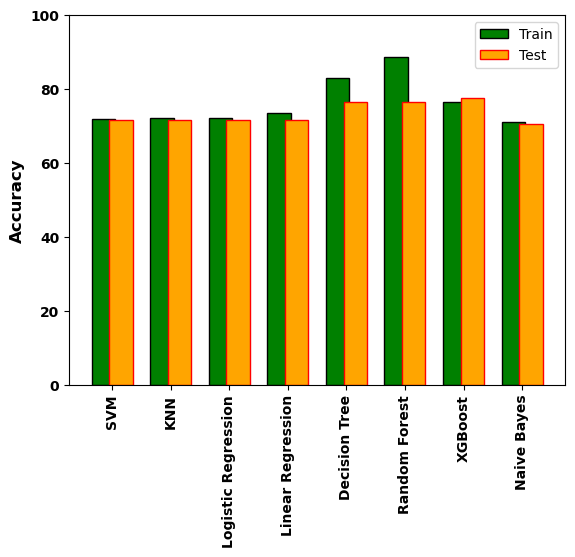

In [51]:
x=['SVM','KNN','Logistic Regression','Linear Regression','Decision Tree','Random Forest','XGBoost','Naive Bayes']

y=[71.74,72.24,71.99,73.46,83.05,88.7,76.47,71]
z=[71.57,71.57,71.57,71.57,76.47,76.47,77.64,70.6]

# c=['b','r','y','g','pink','red','violet']
# c1=['red','blue','green','pink','yellow','m','magenta']

p=np.arange(len(x))
width=0.3
p1=[j+width for j in p]

plt.bar(p,y,color='g',width=0.4,alpha=1,edgecolor='black',label='Train')
plt.bar(p1,z,color='orange',width=0.4,alpha=1,edgecolor='red',label='Test')

# plt.xlabel(fontsize=10,fontwidth='bold',rotate=30)

plt.xticks(p+width/2,x,rotation=90,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
plt.ylim(0,100
        )

plt.legend()
plt.show()
